# W207 Final Project Baseline
Authors: John Lee, Nathan Nusaputra, Ryan Sawasaki

## Abstract

For our baseline model, we decided to use three features detailing the square footage of a home due to domain knowledge. These features are: 'GrLivArea', 'TotalBsmtSF','GarageArea'.  We determined that the linear regression model would be our baseline model since it had the highest accuracy out of the three models we tried using. We will evaluate our future performances on this baseline model.  

Key items that will continue to be discussed:  
A) What will be our evaluation function?  Accuracy with ".score" or Root-Mean-Squared-Error?
B) How are we going to standardize the model (if needed)?  StandardScaler? or another package?
C) Which machine learning model to use? Which hyperparameters to tune? Which features to use?

Steps:  
1) Importing Packages  
We imported a bunch of standard libraries (numpy, pandas, seaborn, etc..) as well as a bunch of sci-kit learn libraries for preprocessing, metrics, and models.  

2) Load and Inspect Data  
We loaded our raw data and inspected the data type and a few samples.  


3) Exploratory Data Analysis  
While exploring the data, we found that there are a lot of missing data. 33 features of the actual test data (data without class labels/sales price) had NaN data while only 19 features of the training data had NaN data. After the baseline, we intend to fill these NaN with zeros when appropriate or just drop the features.  


4) Correlations between Sales Price and Different Features  
We graphed the correlation between Sales Price with float/int type data.  We graphed a few features of object type data with Sales Price to show how we anaylzed the data. Those we find most relative to sales price will be used for our final models (not in this baseline). 


5) Baseline Models  
We determined the features that we will use for our baseline model. Did a scatter plot matrix to further dive into the data. We also did a linear model, kneighbors model, and gradient boosting model (all regressions) on these features to general a baseline model for our project.


## Importing Packages

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import time
import numpy as np
import pandas as pd # to read in csv
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble


# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# SK-learn libraries for feature extraction from text.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

## Load and Inspect Data

In [2]:
#Read in data

# house price data
train_df_raw = pd.read_csv("data_raw\\train.csv") 
test_df_raw = pd.read_csv("data_raw\\test.csv")

print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)
print(train_df_raw.dtypes.value_counts())
train_df_raw.head(2)

Train Shape: (1460, 81)
Test Shape: (1459, 80)
object     43
int64      35
float64     3
dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]

## Exploratory Data Analysis

In [3]:
train_df_raw.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [4]:
test_df_raw.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage       LotArea Street  \
count   1459.000000  1459.000000     1455  1232.000000   1459.000000   1459   
unique          NaN          NaN        5          NaN           NaN      2   
top             NaN          NaN       RL          NaN           NaN   Pave   
freq            NaN          NaN     1114          NaN           NaN   1453   
mean    2190.000000    57.378341      NaN    68.580357   9819.161069    NaN   
std      421.321334    42.746880      NaN    22.376841   4955.517327    NaN   
min     1461.000000    20.000000      NaN    21.000000   1470.000000    NaN   
25%     1825.500000    20.000000      NaN    58.000000   7391.000000    NaN   
50%     2190.000000    50.000000      NaN    67.000000   9399.000000    NaN   
75%     2554.500000    70.000000      NaN    80.000000  11517.500000    NaN   
max     2919.000000   190.000000      NaN   200.000000  56600.000000    NaN   

       Alley LotShape LandContour Utilities  ...  ScreenPorch     PoolArea  \
count    107     1459        1459      1457  ...  1459.000000  1459.000000   
unique     2        4           4         1  ...          NaN          NaN   
top     Grvl      Reg         Lvl    AllPub  ...          NaN          NaN   
freq      70      934        1311      1457  ...          NaN          NaN   
mean     NaN      NaN         NaN       NaN  ...    17.064428     1.744345   
std      NaN      NaN         NaN       NaN  ...    56.609763    30.491646   
min      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
25%      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
50%      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
75%      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
max      NaN      NaN         NaN       NaN  ...   576.000000   800.000000   

       PoolQC  Fence MiscFeature       MiscVal       MoSold       YrSold  \
count       3    290          51   1459.000000  1459.000000  1459.000000   
unique      2      4           3           NaN          NaN          NaN   
top        Ex  MnPrv        Shed           NaN          NaN          NaN   
freq        2    172          46           NaN          NaN          NaN   
mean      NaN    NaN         NaN     58.167923     6.104181  2007.769705   
std       NaN    NaN         NaN    630.806978     2.722432     1.301740   
min       NaN    NaN         NaN      0.000000     1.000000  2006.000000   
25%       NaN    NaN         NaN      0.000000     4.000000  2007.000000   
50%       NaN    NaN         NaN      0.000000     6.000000  2008.000000   
75%       NaN    NaN         NaN      0.000000     8.000000  2009.000000   
max       NaN    NaN         NaN  17000.000000    12.000000  2010.000000   

        SaleType  SaleCondition  
count       1458           1459  
unique         9              6  
top           WD         Normal  
freq        1258           1204  
mean         NaN            NaN  
std          NaN            NaN  
min          NaN            NaN  
25%          NaN            NaN  
50%          NaN            NaN  
75%          NaN            NaN  
max          NaN            NaN  

[11 rows x 80 columns]

**Comment**:
The describe function showed us that we should consider NaN data on many features (see below). Also, it was interesting to see the range of sales price (from 34,900 to 755,000USD) and other feature characteristics.

In [5]:
# Checking Missingness

# TRAINING DATA MISSINGNESS 
df_missing_data = train_df_raw.isnull().sum(axis=0)[train_df_raw.isnull().sum(axis=0) != 0]
# TEST DATA MISSINGNESS
df_missing_data2 = test_df_raw.isnull().sum(axis=0)[test_df_raw.isnull().sum(axis=0) != 0]

# Code to see which sample Id has missing data per feature
feature_train='MasVnrType'
print("Train Feature %s has NaN at following indices:" %feature_train, train_df_raw["Id"][train_df_raw[feature_train].isnull()].unique())
print("")
feature_test='MasVnrType'
print("Test Feature %s has NaN at following indices:" %feature_test, test_df_raw["Id"][test_df_raw[feature_test].isnull()].unique())
print("")

print("Number of train features with missing data:", len(df_missing_data))
#histograms of features with missing data
print("Number of test features with missing data:", len(df_missing_data2))


df_missing1 = pd.DataFrame(df_missing_data, columns=['train_missing_count'])
df_missing2 = pd.DataFrame(df_missing_data2,columns=['test_missing_count'])
df_missing = pd.merge(df_missing1,df_missing2, left_on=df_missing1.index, right_on=df_missing2.index, how='outer')
df_missing.columns=['feature','train_missing_count','test_missing_count']
df_missing=df_missing.sort_values(by=['test_missing_count'], ascending=False)
df_missing

Train Feature MasVnrType has NaN at following indices: [ 235  530  651  937  974  978 1244 1279]

Test Feature MasVnrType has NaN at following indices: [1692 1707 1883 1993 2005 2042 2312 2326 2341 2350 2369 2593 2611 2658
 2687 2863]

Number of train features with missing data: 19
Number of test features with missing data: 33


feature  train_missing_count  test_missing_count
16        PoolQC               1453.0              1456.0
18   MiscFeature               1406.0              1408.0
1          Alley               1369.0              1352.0
17         Fence               1179.0              1169.0
10   FireplaceQu                690.0               730.0
0    LotFrontage                259.0               227.0
12   GarageYrBlt                 81.0                78.0
13  GarageFinish                 81.0                78.0
14    GarageQual                 81.0                78.0
15    GarageCond                 81.0                78.0
11    GarageType                 81.0                76.0
5       BsmtCond                 37.0                45.0
6   BsmtExposure                 38.0                44.0
4       BsmtQual                 37.0                44.0
8   BsmtFinType2                 38.0                42.0
7   BsmtFinType1                 37.0                42.0
2     MasVnrType                  8.0                16.0
3     MasVnrArea                  8.0                15.0
19      MSZoning                  NaN                 4.0
27  BsmtFullBath                  NaN                 2.0
30    Functional                  NaN                 2.0
28  BsmtHalfBath                  NaN                 2.0
20     Utilities                  NaN                 2.0
24    BsmtFinSF2                  NaN                 1.0
25     BsmtUnfSF                  NaN                 1.0
26   TotalBsmtSF                  NaN                 1.0
23    BsmtFinSF1                  NaN                 1.0
22   Exterior2nd                  NaN                 1.0
29   KitchenQual                  NaN                 1.0
21   Exterior1st                  NaN                 1.0
31    GarageCars                  NaN                 1.0
32    GarageArea                  NaN                 1.0
33      SaleType                  NaN                 1.0
9     Electrical                  1.0                 NaN

**Comment**:  
We found many features with NaN data. We intend to fill these NaN data with our domain knowledge (i.e. for those missing "LotFrontage" for size of front lot data, we would just show 0's instead of NaN).  Otherwise, we will drop the feature themselves (i.e. "PoolQC" for Pool Quality).

In [6]:
# Check for Duplicates?
print("Duplicates in Train Data:",sum(train_df_raw.duplicated()))
print("Duplicates in Test Data:",sum(test_df_raw.duplicated()))

Duplicates in Train Data: 0
Duplicates in Test Data: 0


**Comment**:  
There are no duplicated data.

## Checking Correlations between Sales Price and Other Features

In [7]:
##Number of each Type of data:
# print(train_df_raw.dtypes[(train_df_raw.dtypes != 'float') & (train_df_raw.dtypes !='int64')])
print("Float: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'float')]))
print("Int: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'int64')]))
print("Object: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'object')]))

Float: 3
Int: 35
Object: 43


**Comment**:  
Since the data type range from Float, Int, to Object, we must show correlation differently.  Float and Int type data can be shown with a correlation graph.  Object type data can be shown with boxplot or lmplot.
    

Float & Int Features: 37


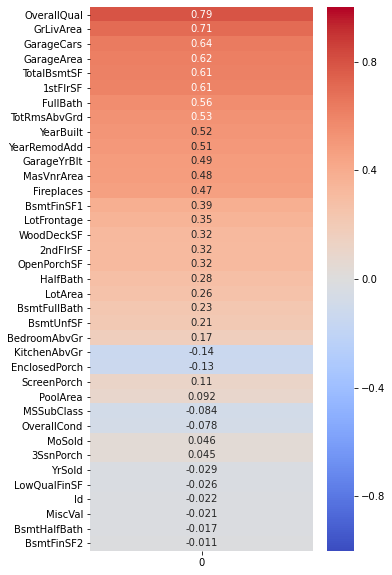

In [8]:
#Correlations between Sales Price & Int/Float Features
correlations = train_df_raw.corrwith(train_df_raw['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);
print("Float & Int Features: %d" %len(correlations))

**Comment**:  
We can see that OverallQual, GrLivArea, GarageCars are the top 3 most correlated features to Sales Price.  

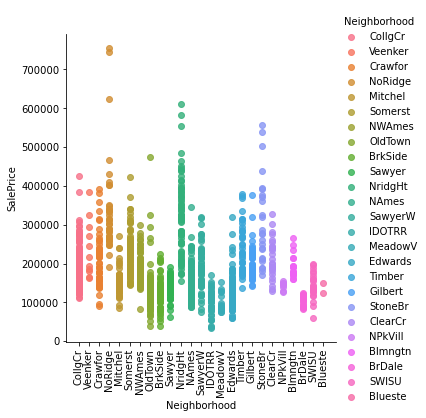

In [9]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: Neighborhood

neighborhood_df = train_df_raw[['Neighborhood','SalePrice']]
neigh_plot = sns.lmplot('Neighborhood', 'SalePrice', data=neighborhood_df, hue='Neighborhood', fit_reg=False)
neigh_plot.set_xticklabels(rotation=90)

**Comment**:  
We see that for certain neighborhoods, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

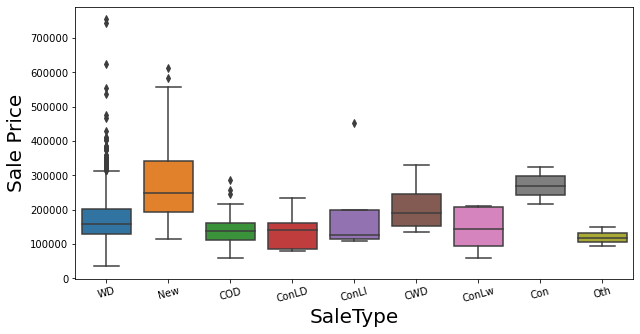

In [10]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: SaleType

feature_object = 'SaleType'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.SaleType     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(10,5))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for New (just constructed and sold) and Con (15% down payment) Type, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

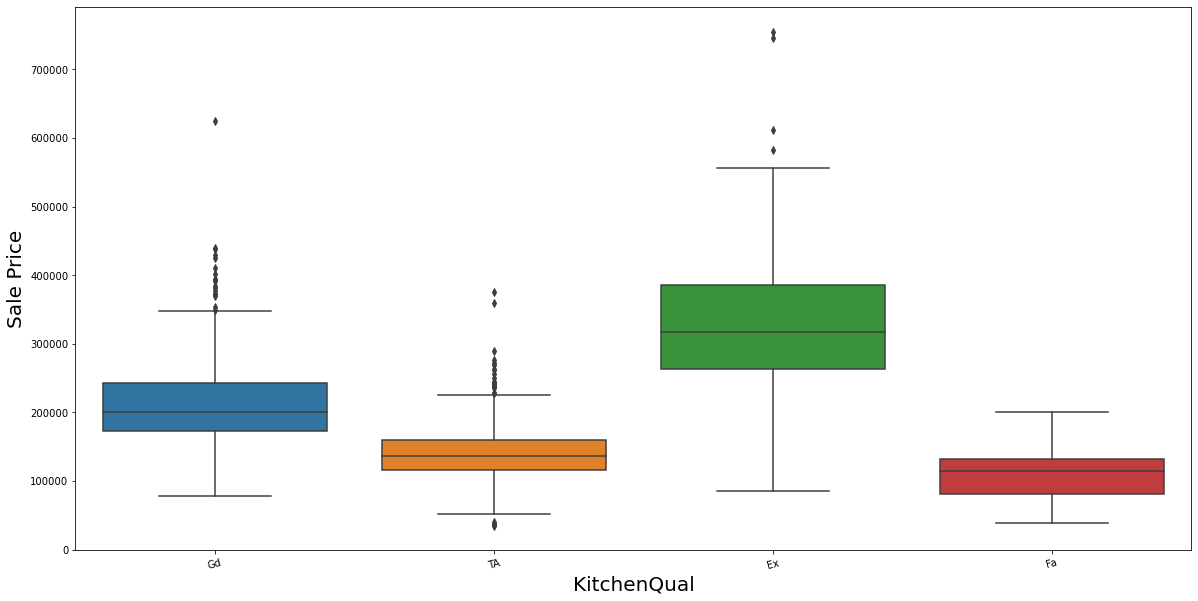

In [11]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: KitchenQual

feature_object = 'KitchenQual'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.KitchenQual     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for Ex (excellent) kitchen quality, the Sales Price is generally higher.

## Baseline Model(s)

**Comment**:
Using our domain knowledge, we believe the square footage of a house is most indicative of a house's sales price. We can see that the Ground Living Area (GrLivArea), Total Basement Area (TotalBsmtSF), and Garage Area (GarageArea) are 3 of the top 5 most correlated to the Sales Price in the plot above. Therefore, our baseline model will include these three features.

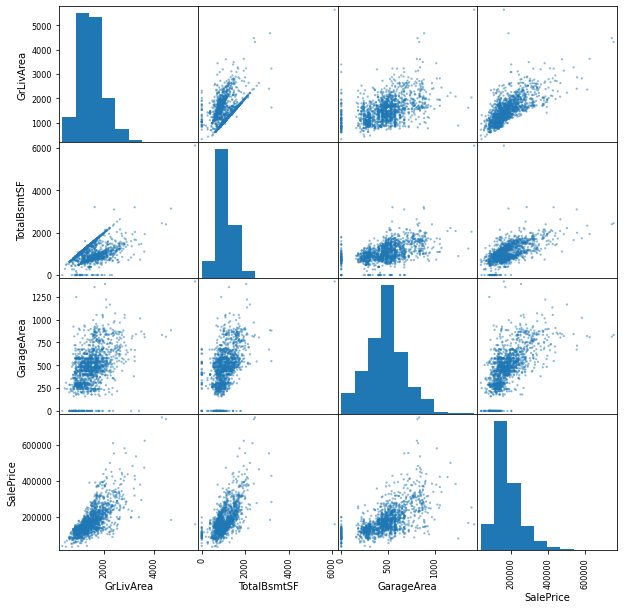

In [12]:
# Scatterplot matrix of baseline model features

baseline_features=['GrLivArea', 'TotalBsmtSF','GarageArea','SalePrice']
train_df_baseline=train_df_raw[baseline_features]
train_df_baseline.head()
ax = pd.plotting.scatter_matrix(train_df_baseline,
                                figsize=(10,10),
                                marker='o', s=5)
for ax in ax.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)

**Comment**:  
Scatterplot matrix shows trends indicating that sales price goes up when ground living area, basement area, and garage area goes up.

In [13]:
# Format Data for Modeling

#Standardize Data
scaler=StandardScaler()
train_df_std=pd.DataFrame(scaler.fit_transform(train_df_baseline))
X = train_df_std.iloc[:,:-1]
y = train_df_std.iloc[:,-1]
train_data_bl_std, dev_data_bl_std, train_labels_bl_std, dev_labels_bl_std = train_test_split(X,y, test_size=0.2) 
print("Standardized Train Data Shape:", train_data_bl_std.shape)
print("Standardized Dev Data Shape:", dev_data_bl_std.shape)

#Did not Standardize Data
X = train_df_baseline.iloc[:,:-1]
y = train_df_baseline.iloc[:,-1]
train_data_bl, dev_data_bl, train_labels_bl, dev_labels_bl = train_test_split(X,y, test_size=0.2)  
print("UnStandardized Train Data Shape:", train_data_bl.shape)
print("UnStandardized Dev Data Shape:", dev_data_bl.shape)

Standardized Train Data Shape: (1168, 3)
Standardized Dev Data Shape: (292, 3)
UnStandardized Train Data Shape: (1168, 3)
UnStandardized Dev Data Shape: (292, 3)


**Comment**:
We started work with non-standardized data because we were only comparing square footage features in our baseline. However, we will investigate standardized data further after this baseline model

Estimated function: y = -20418.29 + 67.47*x_1 + 46.55*x_2 + 104.50*x_3
R^2: 0.6439784556177048
Accuracy: 0.7251224998312179
Root Mean Squared Error: 43316.40702357577


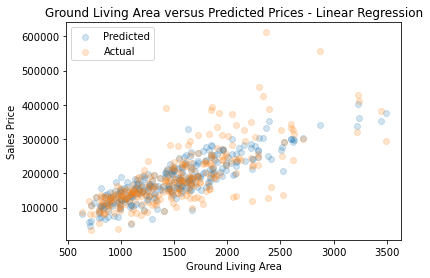

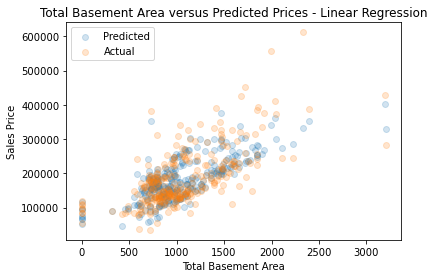

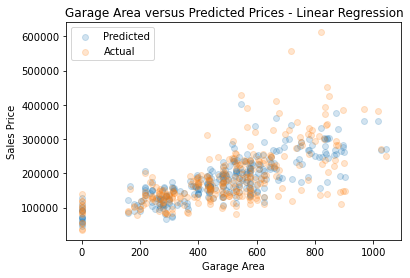

In [14]:
#Linear regression model without Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl, train_labels_bl)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl)    #predict
print("R^2:",lr.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))

fig2=plt.figure()
fig2=plt.title('Ground Living Area versus Predicted Prices - Linear Regression')
fig2=plt.xlabel('Ground Living Area')
fig2=plt.ylabel('Sales Price')
fig2=plt.scatter(dev_data_bl['GrLivArea'],prediction, alpha=0.2)
fig2=plt.scatter(dev_data_bl['GrLivArea'],dev_labels_bl, alpha=0.2)
fig2=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig3=plt.figure()
fig3=plt.title('Total Basement Area versus Predicted Prices - Linear Regression')
fig3=plt.xlabel('Total Basement Area')
fig3=plt.ylabel('Sales Price')
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],prediction, alpha=0.2)
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],dev_labels_bl, alpha=0.2)
fig3=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig4=plt.figure()
fig4=plt.title('Garage Area versus Predicted Prices - Linear Regression')
fig4=plt.xlabel('Garage Area')
fig4=plt.ylabel('Sales Price')
fig4=plt.scatter(dev_data_bl['GarageArea'],prediction, alpha=0.2)
fig4=plt.scatter(dev_data_bl['GarageArea'],dev_labels_bl, alpha=0.2)
fig4=plt.legend(['Predicted', 'Actual'],loc='upper left')

**Comment**:  
It appears that the linear regression model without standardized data performed the best in terms of accuracy.

In [15]:
#Linear regression model with Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl_std, train_labels_bl_std)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl_std)    #predict
print("R^2:",lr.score(train_data_bl_std,train_labels_bl_std))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl_std,dev_labels_bl_std))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl_std, prediction, squared=False))

Estimated function: y = -0.00 + 0.47*x_1 + 0.33*x_2 + 0.27*x_3
R^2: 0.7114761818985047
Accuracy: 0.4654483981670771
Root Mean Squared Error: 0.7650666138128865


**Comment**:  
It appears that the linear regression model with standardized data performed worse but the RMSE is much lower.

In [16]:
#K-Nearest Neighbors Regressor Model

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(train_data_bl, train_labels_bl)  
prediction = knn.predict(dev_data_bl)
print("R^2:",knn.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",knn.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))


R^2: 0.9983157512681696
Accuracy: 0.46937591961714936
Root Mean Squared Error: 60183.34290381989


**Comment**:  
We wanted to try out k Neighbors to see its performance. It appears that the k neighbors regression model with non-standardized data had lower accuracy than linear regression.

In [17]:
#Gradient Boosting Regressor Model

train_data_bl = train_data_bl[['GrLivArea', 'TotalBsmtSF','GarageArea']]
dev_data_bl = dev_data_bl[['GrLivArea','TotalBsmtSF', 'GarageArea']]
gradbst = ensemble.GradientBoostingRegressor(n_estimators = 10, max_depth=5, min_samples_split=2, learning_rate=0.1,
                                            loss='ls')
gradbst.fit(train_data_bl, train_labels_bl)
prediction = gradbst.predict(dev_data_bl)
gradbst.score(dev_data_bl,dev_labels_bl)

print("R^2:",gradbst.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",gradbst.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))


R^2: 0.7330373829107583
Accuracy: 0.6643609973207428
Root Mean Squared Error: 47865.107719696854


**Comment**:  
We wanted to try out gradient boosting regressor with nonstandardized data to also see its performance. It appears to have relatively high accuracy compared with linear regression and k-nearest neighbors regression.   


## Data Formatting

After EDA, we have determined several features that may be dropped due to large amounts of missing/NaN data. Other features with missing/NaN data will be converted to None or 0 value so that the feature may still be used in our model.  

Categorical data will be separated to ordinal and nominal. Ordinal data will be converted to integers that include the ordering of the data. Nominal data will be converted to dummy variables.  

Finally, we will standard scale all of the independent features while leaving the dependent feature (saleprice) alone.

In [18]:
# ORIGINAL DATA SIZE FOR REFERENCE
print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)

Train Shape: (1460, 81)
Test Shape: (1459, 80)


In [19]:
# DROPPING TOP 5 MOST MISSING/NAN FEATURES:
top_5_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train_df_raw2 = train_df_raw.drop(top_5_missing,axis=1)
test_df_raw2 = test_df_raw.drop(top_5_missing,axis=1)
print("Train Data Dropped Top 5 Missing/NaN Columns Shape:", train_df_raw2.shape)
print("Test Data Dropped Top 5 Missing/NaN Columns Shape:", test_df_raw2.shape)

Train Data Dropped Top 5 Missing/NaN Columns Shape: (1460, 76)
Test Data Dropped Top 5 Missing/NaN Columns Shape: (1459, 75)


In [20]:
# CONVERTING NAN DATA TO 0 OR NONE

#Numerical Data to 0
numerical_NaN = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars',
                 'GarageArea']
train_df_raw2[numerical_NaN]=train_df_raw2[numerical_NaN].fillna(0)
test_df_raw2[numerical_NaN]=test_df_raw2[numerical_NaN].fillna(0)

#Categorical Data to None
categorical_NaN = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType',
                   'SaleType','Electrical','GarageType','Functional','BsmtQual',
                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'KitchenQual','GarageFinish','GarageQual','GarageCond']
train_df_raw2[categorical_NaN]=train_df_raw2[categorical_NaN].fillna('None')
test_df_raw2[categorical_NaN]=test_df_raw2[categorical_NaN].fillna('None')

# Check if it worked by checking Missingness
dftrain_missing = train_df_raw2.isnull().sum(axis=0)[train_df_raw2.isnull().sum(axis=0) != 0] # TRAINING DATA MISSINGNESS 
dftest_missing = test_df_raw2.isnull().sum(axis=0)[test_df_raw2.isnull().sum(axis=0) != 0] # TEST DATA MISSINGNESS
print("Number of train features (after replacing NaN data) with missing data:", len(dftrain_missing))
print("Number of test features (after replacing NaN data) with missing data:", len(dftest_missing))

Number of train features (after replacing NaN data) with missing data: 0
Number of test features (after replacing NaN data) with missing data: 0


In [21]:
# CONVERT ORDINAL DATA TO INTEGERS TO INCLUDE ORDERING OF DATA

# 1 is worst, largest number is best, use mapping
train_df_raw2['Functional']=train_df_raw2['Functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'None':0})
train_df_raw2['BsmtQual']=train_df_raw2['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['BsmtCond']=train_df_raw2['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['BsmtExposure']=train_df_raw2['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0,'None':0})
train_df_raw2['BsmtFinType1']=train_df_raw2['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['BsmtFinType2']=train_df_raw2['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['KitchenQual']=train_df_raw2['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train_df_raw2['GarageFinish']=train_df_raw2['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['GarageQual']=train_df_raw2['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['GarageCond']=train_df_raw2['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['ExterQual']=train_df_raw2['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['ExterCond']=train_df_raw2['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['LotShape']=train_df_raw2['LotShape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0,'None':0})
train_df_raw2['LandSlope']=train_df_raw2['LandSlope'].map({'Gtl':3,'Mod':2,'Sev':1,'NA':0,'None':0})
train_df_raw2['HeatingQC']=train_df_raw2['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['PavedDrive']=train_df_raw2['PavedDrive'].map({'Y':3,'P':2,'N':1,'NA':0,'None':0})

test_df_raw2['Functional']=test_df_raw2['Functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'None':0})
test_df_raw2['BsmtQual']=test_df_raw2['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['BsmtCond']=test_df_raw2['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['BsmtExposure']=test_df_raw2['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0,'None':0})
test_df_raw2['BsmtFinType1']=test_df_raw2['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['BsmtFinType2']=test_df_raw2['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['KitchenQual']=test_df_raw2['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test_df_raw2['GarageFinish']=test_df_raw2['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['GarageQual']=test_df_raw2['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['GarageCond']=test_df_raw2['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['ExterQual']=test_df_raw2['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['ExterCond']=test_df_raw2['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['LotShape']=test_df_raw2['LotShape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0,'None':0})
test_df_raw2['LandSlope']=test_df_raw2['LandSlope'].map({'Gtl':3,'Mod':2,'Sev':1,'NA':0,'None':0})
test_df_raw2['HeatingQC']=test_df_raw2['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['PavedDrive']=test_df_raw2['PavedDrive'].map({'Y':3,'P':2,'N':1,'NA':0,'None':0})


In [22]:
# CONVERT NOMINAL DATA TO DUMMIES

""" Running get_dummies on train and test data separately would not work because some training data could be
missing in test data and vice versa.  Therefore, we will combine all data and get_dummies. 
Reference: https://stackoverflow.com/questions/56738267/how-can-i-align-pandas-get-dummies-across-training-validation-testing 
"""
all_data = pd.concat([train_df_raw2, test_df_raw2]) 
all_data_dummy = pd.get_dummies(all_data)
print("all_data shape:", all_data_dummy.shape)

#We cannot split the data back to train, dev, and test yet, because standardizing features has the same issue

all_data shape: (2919, 223)


In [23]:
# MIN MAX SCALER THE DATA
from sklearn.preprocessing import MinMaxScaler

#First pull out SalePrice column since we won't be standard scaling the dependent feature
X=all_data_dummy.drop(['SalePrice'],axis=1)
Y=all_data_dummy['SalePrice']
print("Shape of all_data (dummies) X:", X.shape)
print("Shape of all_data (dummies) Y:", Y.shape)
#X.head(1)

#Standard Scale!
scaler=MinMaxScaler()
X_std=pd.DataFrame(scaler.fit_transform(X))      #only standard scaled independent features
print("Shape of standardized X:", X_std.shape)
#X_std.head(1)

#Add the Sale Price feature column back into all_data
all_data_std = X_std
all_data_std = all_data_std.assign(SalePrice = list(Y))  #adds SalePrice data back in
print("Shape of standardized X plus SalePrice column:", all_data_std.shape)

Shape of all_data (dummies) X: (2919, 222)
Shape of all_data (dummies) Y: (2919,)
Shape of standardized X: (2919, 222)
Shape of standardized X plus SalePrice column: (2919, 223)


In [24]:
X.head(1)

Id  MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0   1          60         65.0     8450         4          3            7   

   OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_New  SaleType_None  \
0            5       2003          2003  ...             0              0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   

   SaleCondition_Partial  
0                      0  

[1 rows x 222 columns]

In [25]:
X_std.head(1)

0         1         2        3    4    5         6    7         8    \
0  0.0  0.235294  0.207668  0.03342  1.0  1.0  0.666667  0.5  0.949275   

        9    ...  212  213  214  215  216  217  218  219  220  221  
0  0.883333  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  

[1 rows x 222 columns]

In [26]:
all_data_std.head(1)

0         1         2        3    4    5         6    7         8  \
0  0.0  0.235294  0.207668  0.03342  1.0  1.0  0.666667  0.5  0.949275   

          9  ...  213  214  215  216  217  218  219  220  221  SalePrice  
0  0.883333  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   208500.0  

[1 rows x 223 columns]

In [27]:
# SPLIT ALL_DATA TO TRAIN/TEST. THEN SPLIT TRAIN TO TEST/DEV.

# Split all_data to Train/Test
train_raw2, test_raw2 = train_test_split(all_data_std, test_size=1459/2919, shuffle=False)
test_raw2 = test_raw2.drop(['SalePrice'],axis=1)  #original test_data did not have SalePrice feature
print(train_raw2.shape)
print(test_raw2.shape)
test_data = test_raw2  #renaming test data

# Split Train data to Test/Dev
x = train_raw2.iloc[:,:-1]
y = train_raw2.iloc[:,-1]
train_data, dev_data, train_labels, dev_labels = train_test_split(x,y, test_size=0.2)  #20% dev, 80% test
print("Standardized Train Data Shape:", train_data.shape)
print("Standardized Dev Data Shape:", dev_data.shape)
print("Train Label Shape:", train_labels.shape)
print("Dev Label Shape:", dev_labels.shape)

(1460, 223)
(1459, 222)
Standardized Train Data Shape: (1168, 222)
Standardized Dev Data Shape: (292, 222)
Train Label Shape: (1168,)
Dev Label Shape: (292,)


In [28]:
train_raw2

0         1         2         3         4    5         6      7  \
0     0.000000  0.235294  0.207668  0.033420  1.000000  1.0  0.666667  0.500   
1     0.000343  0.000000  0.255591  0.038795  1.000000  1.0  0.555556  0.875   
2     0.000685  0.235294  0.217252  0.046507  0.666667  1.0  0.666667  0.500   
3     0.001028  0.294118  0.191693  0.038561  0.666667  1.0  0.666667  0.500   
4     0.001371  0.235294  0.268371  0.060576  0.666667  1.0  0.777778  0.500   
...        ...       ...       ...       ...       ...  ...       ...    ...   
1455  0.498629  0.235294  0.198083  0.030929  1.000000  1.0  0.555556  0.500   
1456  0.498972  0.000000  0.271565  0.055505  1.000000  1.0  0.555556  0.625   
1457  0.499315  0.294118  0.210863  0.036187  1.000000  1.0  0.666667  1.000   
1458  0.499657  0.000000  0.217252  0.039342  1.000000  1.0  0.444444  0.625   
1459  0.500000  0.000000  0.239617  0.040370  1.000000  1.0  0.444444  0.625   

             8         9  ...  213  214  215  216  217  218  219  220  221  \
0     0.949275  0.883333  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.753623  0.433333  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2     0.934783  0.866667  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
3     0.311594  0.333333  ...  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
4     0.927536  0.833333  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
...        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1455  0.920290  0.833333  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1456  0.768116  0.633333  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1457  0.500000  0.933333  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1458  0.565217  0.766667  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1459  0.673913  0.250000  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   

      SalePrice  
0      208500.0  
1      181500.0  
2      223500.0  
3      140000.0  
4      250000.0  
...         ...  
1455   175000.0  
1456   210000.0  
1457   266500.0  
1458   142125.0  
1459   147500.0  

[1460 rows x 223 columns]

In [29]:
# Replace the column names with original feature names from train data
for i in range(len(train_data.columns)):
    train_data = train_data.rename(columns={i: X.columns[i]})

for i in range(len(dev_data.columns)):
    dev_data = dev_data.rename(columns={i: X.columns[i]})

for i in range(len(test_data.columns)):
    test_data = test_data.rename(columns={i: X.columns[i]})

In [30]:
# SUMMARY OF DATA

# "train_data"    = Training Data
# "train_labels"  = Training Labels
# "dev_data"      = Development Data (to check accuracy of Machine Learning models)
# "dev_labels"    = Development Labels (to check accuracy of Machine Learning models)
# "test_data"     = Test Data (to predict housing price for submitting to Kaggle)


print("train_data:", train_data.shape)
print("train_labels:", train_labels.shape)
print("dev_data:", dev_data.shape)
print("dev_labels:", dev_labels.shape)
print("test_data",test_data.shape)

train_data: (1168, 222)
train_labels: (1168,)
dev_data: (292, 222)
dev_labels: (292,)
test_data (1459, 222)


In [31]:
train_data.describe()

Id   MSSubClass  LotFrontage      LotArea     LotShape  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.249488     0.214444     0.184379     0.043746     0.863584   
std       0.144408     0.242864     0.110127     0.050649     0.195732   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.125685     0.000000     0.130990     0.028979     0.666667   
50%       0.246744     0.176471     0.204473     0.037989     1.000000   
75%       0.373286     0.294118     0.255591     0.048376     1.000000   
max       0.499657     1.000000     1.000000     1.000000     1.000000   

         LandSlope  OverallQual  OverallCond    YearBuilt  YearRemodAdd  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  ...   
mean      0.966182     0.566305     0.569456     0.721883      0.583975  ...   
std       0.144639     0.154763     0.138968     0.215506      0.340771  ...   
min       0.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       1.000000     0.444444     0.500000     0.594203      0.300000  ...   
50%       1.000000     0.555556     0.500000     0.731884      0.716667  ...   
75%       1.000000     0.666667     0.625000     0.927536      0.900000  ...   
max       1.000000     1.000000     1.000000     1.000000      1.000000  ...   

       SaleType_New  SaleType_None  SaleType_Oth  SaleType_WD  \
count   1168.000000         1168.0   1168.000000  1168.000000   
mean       0.076199            0.0      0.001712     0.877568   
std        0.265429            0.0      0.041363     0.327924   
min        0.000000            0.0      0.000000     0.000000   
25%        0.000000            0.0      0.000000     1.000000   
50%        0.000000            0.0      0.000000     1.000000   
75%        0.000000            0.0      0.000000     1.000000   
max        1.000000            0.0      1.000000     1.000000   

       SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
count            1168.000000            1168.000000           1168.000000   
mean                0.071918               0.003425              0.007705   
std                 0.258462               0.058445              0.087479   
min                 0.000000               0.000000              0.000000   
25%                 0.000000               0.000000              0.000000   
50%                 0.000000               0.000000              0.000000   
75%                 0.000000               0.000000              0.000000   
max                 1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1168.000000           1168.000000            1168.000000  
mean               0.011986              0.827055               0.077911  
std                0.108870              0.378362               0.268146  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 222 columns]

Float & Int Features: 221


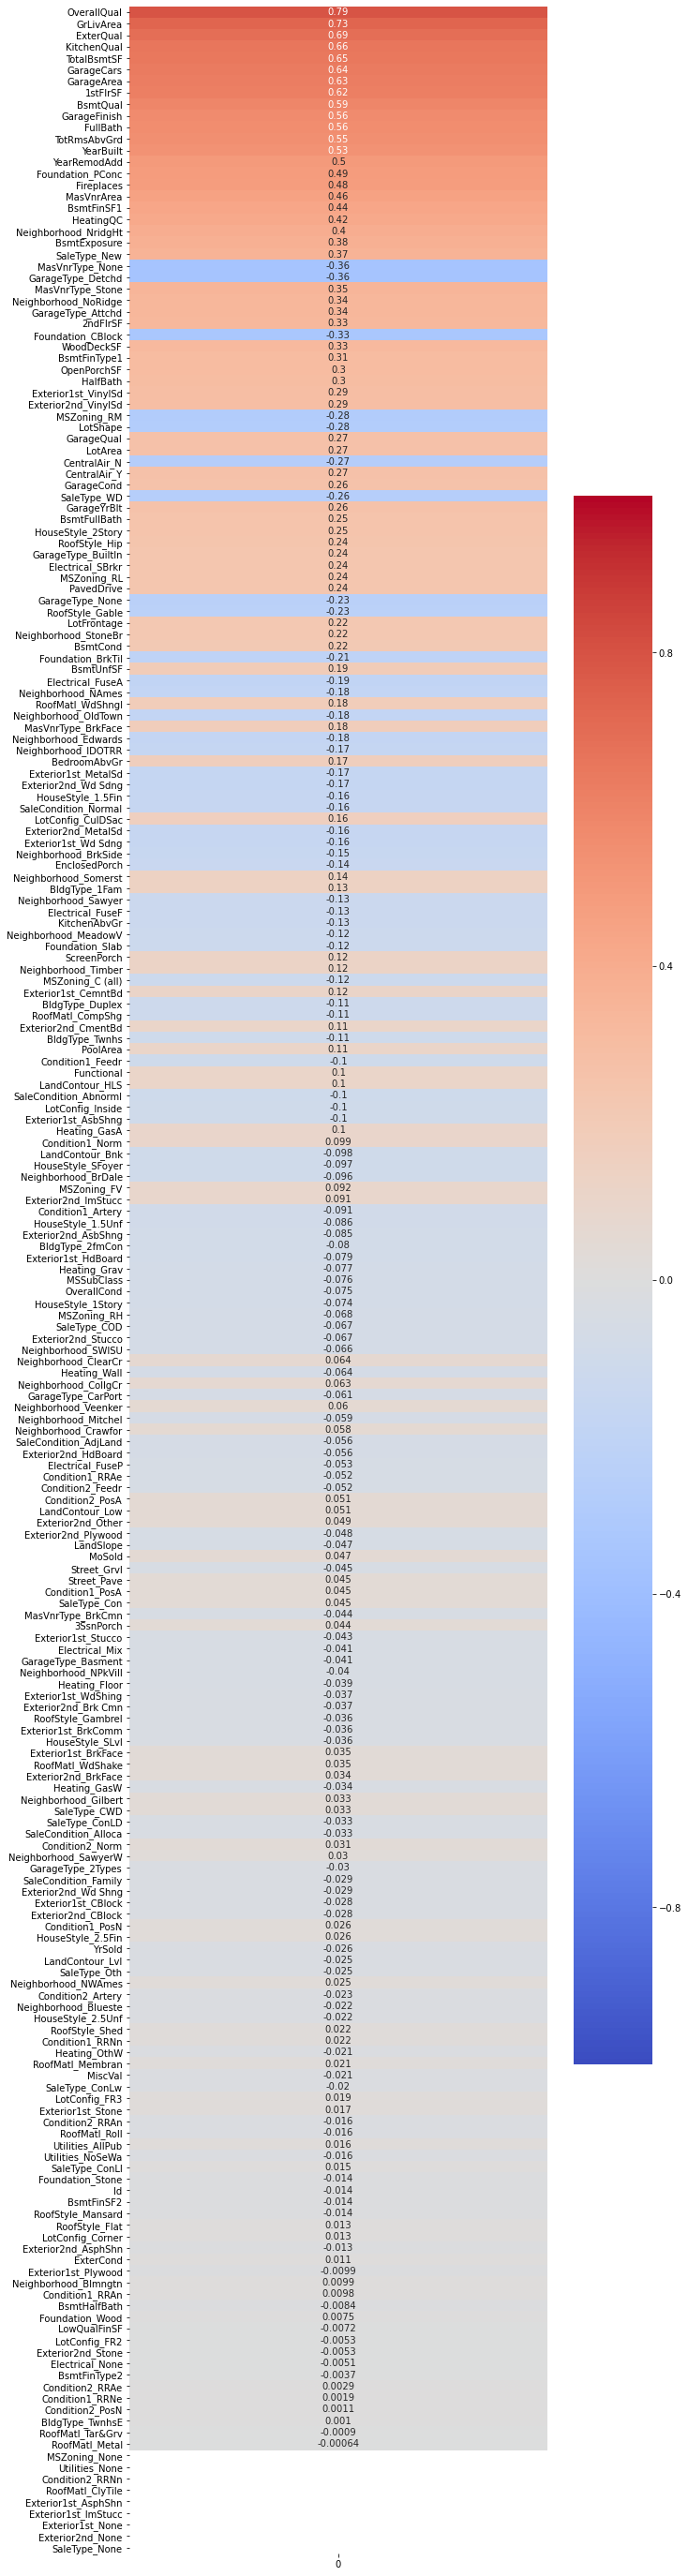

In [32]:
#Correlations between Sales Price & Int/Float Features
correlations = train_data.corrwith(train_df_raw['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,50))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);
print("Float & Int Features: %d" %len(correlations))

# MACHINE LEARNING MODELS

In [33]:
# Creating functions that can be used for all models

#Function to return R^2, Accuracy, Mean-Squared-Error, Mean-Squared-Log-Error 
def accuracies(regressor, train_data=train_data, dev_data=dev_data, prediction=prediction):
    #If there are negative predictions, end function
    neg = np.where(prediction<0)
    if len(neg[0])>0:
        print("Negative Price Prediction at indices:", neg) 
        print("Actual Sale Price at Negative Prediction:")
        print(dev_labels.iloc[neg])
        return
    print("R^2:",regressor.score(train_data,train_labels))    #Finding R^2
    print("Accuracy:",regressor.score(dev_data,dev_labels))    #Finding accuracy of dev data
    print("Mean Squared Error:", mean_squared_error(dev_labels, prediction, squared=False))
    print("Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction))
    fig=plt.figure()
    fig=plt.title('Sale Prices (prediction & actual)')
    fig=plt.xlabel('Ground Living Area')
    fig=plt.ylabel('Sales Price')
    fig=plt.scatter(dev_data['GrLivArea'],prediction, alpha=0.2)
    fig=plt.scatter(dev_data['GrLivArea'],dev_labels_bl, alpha=0.2)
    fig=plt.legend(['Predicted', 'Actual'],loc='upper left')

#Function to predict the test data (data without labels):
def predict_test(regressor):
    test_prediction = regressor.predict(test_data)
    for each in test_prediction:
        print(each)
    return test_prediction


### Randomized Search CV with Gradient Boosting Regressor

In [34]:
def rscv_with_gbr():
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import mean_squared_log_error

    train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
    dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
    test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]


    def GBR():
        gradbst = ensemble.GradientBoostingRegressor(min_samples_split=2,
                                                    loss='ls')
        gradbst_param = dict(n_estimators=range(1,10), max_depth=range(1,5), learning_rate= np.linspace(0,1,11))
        clf = RandomizedSearchCV(gradbst, gradbst_param, random_state=0, scoring='neg_mean_squared_log_error')
        search = clf.fit(train_data, train_labels)
        print(search.best_params_)
        return
    GBR()


    # USING PARAMETERS FROM train_data_mod Randomized Search CV
    gradbst_max = ensemble.GradientBoostingRegressor(n_estimators = 150, max_depth = 9, min_samples_split=2, learning_rate=.2,
                                                     loss='ls')
    gradbst_max.fit(train_data_mod, train_labels)
    prediction = gradbst_max.predict(dev_data_mod)
    gradbst_max.score(dev_data_mod,dev_labels)
    accuracies(gradbst_max, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)


    # USING PARAMETERS FROM train_data Randomized Search CV
    gradbst_max = ensemble.GradientBoostingRegressor(n_estimators = 130, max_depth = 1, min_samples_split=2, learning_rate=1.0,
                                                     loss='ls')
    gradbst_max.fit(train_data, train_labels)
    prediction = gradbst_max.predict(dev_data)
    gradbst_max.score(dev_data,dev_labels)
    accuracies(gradbst_max, train_data=train_data, dev_data=dev_data, prediction=prediction)

#scv_with_gbr()

### Linear Regressor

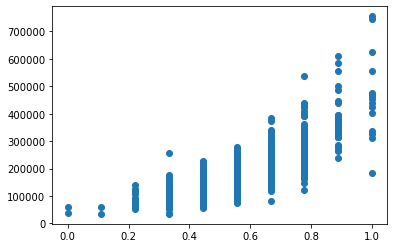

In [35]:
plt.scatter( train_data['OverallQual'], train_labels)   #predicts negative numbers

In [36]:
def lr():
    #Linear regression model 
    train_data_mod = train_data[['OverallQual']]
    dev_data_mod = dev_data[['OverallQual']]
    test_data_mod = test_data[['OverallQual']]
#     train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
#     dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
#     test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]

    print("Linear Regressor with modified Data:")
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_data_mod, train_labels)                 #fit model
    prediction = lr.predict(dev_data_mod)                 #predict
    accuracies(lr, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)

    print("")
    print("Linear Regressor with all features:")
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_data, train_labels)                 #fit model
    prediction = lr.predict(dev_data)                #predict
    accuracies(lr, train_data=train_data, dev_data=dev_data, prediction=prediction)
lr()

Linear Regressor with modified Data:
Negative Price Prediction at indices: (array([27], dtype=int64),)
Actual Sale Price at Negative Prediction:
636    60000.0
Name: SalePrice, dtype: float64

Linear Regressor with all features:
Negative Price Prediction at indices: (array([109, 172, 184, 200, 234, 254], dtype=int64),)
Actual Sale Price at Negative Prediction:
1187    262000.0
1298    160000.0
548     125000.0
29       68500.0
825     385000.0
1011    100000.0
Name: SalePrice, dtype: float64


### K-Nearest Regressor

In [37]:
def knn():
    #K-Nearest Neighbors
    train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
    dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
    test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]


    # print("k-Nearest Neighbors Regressor:  ")
    # K= [int(x) for x in np.linspace(25,50,10)]    #runs kNN for x100 k's between 1 to 1000
    # scores2 = {}   #stores scores for each k
    # for k in K:
    #     # k-Nearest Neighbors Model
    #     knn = KNeighborsRegressor(n_neighbors=k)
    #     knn.fit(train_data, train_labels)  
    #     dev_predicted_labels = knn.predict(dev_data)
    #     # finding, printing, and storing f1_score    
    #     scores2[k] = knn.score(dev_data, dev_labels)

    # best = max(scores2, key=scores2.get)
    # print("Best scores is %.3f when K is %s" %(scores2[best],best))
    # #Plotting
    # fig1=plt.figure()
    # fig1=plt.title('kNN: k versus scores')
    # fig1=plt.xlabel('k')
    # fig1=plt.ylabel('scores')
    # fig1=plt.plot(list(scores2.keys()), list(scores2.values()))
    # plt.show()


    k=30  #best from previous graph
    print("k-Nearest Neighbors with modified Data:")
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_data_mod, train_labels)                  #fit model
    prediction = knn.predict(dev_data_mod)                 #predict
    accuracies(knn, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)

    k=30  #best from previous graph
    print("")
    print("k-Nearest Neighbors with all features:")
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_data, train_labels)                  #fit model
    prediction = knn.predict(dev_data)                 #predict
    accuracies(knn, train_data=train_data, dev_data=dev_data, prediction=prediction)
# knn()

### K-Nearest Regressor with Bagging

In [38]:
def knn_with_bagging():
    from sklearn.ensemble import BaggingRegressor
    train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
    dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
    test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]

    k=30  #best from previous graph
    print("")
    print("k-Nearest Neighbors w/ Bagging with modified data:")
    knn = KNeighborsRegressor(n_neighbors=k)
    bagging = BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=100, 
                               max_samples=0.5, max_features=0.5, random_state=0)
    bagging.fit(train_data_mod, train_labels)                  #fit model
    prediction = bagging.predict(dev_data_mod)                 #predict
    accuracies(bagging, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)



    k=30  #best from previous graph
    print("")
    print("k-Nearest Neighbors w/ Bagging with all features:")
    knn = KNeighborsRegressor(n_neighbors=k)
    bagging = BaggingRegressor(base_estimator=KNeighborsRegressor(), n_estimators=100, 
                               max_samples=0.5, max_features=0.5, random_state=0)
    bagging.fit(train_data, train_labels)                  #fit model
    prediction = bagging.predict(dev_data)                 #predict
    accuracies(bagging, train_data=train_data, dev_data=dev_data, prediction=prediction)



    #predict test data
    #predict_test(bagging)
# knn_with_bagging()

### DecisionTree, RandomForest, ExtraTrees

In [39]:
def dt_rf_et():
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import ExtraTreesRegressor
    train_data_mod = train_data[['GrLivArea', 'TotalBsmtSF','GarageArea', '1stFlrSF']]
    dev_data_mod = dev_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]
    test_data_mod = test_data[['GrLivArea','TotalBsmtSF', 'GarageArea', '1stFlrSF']]


    print("")
    print("Decision Tree Regressor with modified data:")
    DTR = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=0)
    DTR.fit(train_data_mod, train_labels)                  #fit model
    prediction = DTR.predict(dev_data_mod)                 #predict
    accuracies(DTR, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)


    print("")
    print("Random Forest Regressor with modified data:")
    RFR = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    RFR.fit(train_data_mod, train_labels)                  #fit model
    prediction = RFR.predict(dev_data_mod)                 #predict
    accuracies(RFR, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)


    print("")
    print("Extra Trees Regressor with modified data:")
    ETR = ExtraTreesRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    ETR.fit(train_data_mod, train_labels)                  #fit model
    prediction = ETR.predict(dev_data_mod)                 #predict
    accuracies(ETR, train_data=train_data_mod, dev_data=dev_data_mod, prediction=prediction)




    print("")
    print("Decision Tree Regressor with all features:")
    DTR = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=0)
    DTR.fit(train_data, train_labels)                  #fit model
    prediction = DTR.predict(dev_data)                 #predict
    accuracies(DTR, train_data=train_data, dev_data=dev_data, prediction=prediction)


    print("")
    print("Random Forest Regressor with all features:")
    RFR = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    RFR.fit(train_data, train_labels)                  #fit model
    prediction = RFR.predict(dev_data)                 #predict
    accuracies(RFR, train_data=train_data, dev_data=dev_data, prediction=prediction)



    print("")
    print("Extra Trees Regressor with all features:")
    ETR = ExtraTreesRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
    ETR.fit(train_data, train_labels)                  #fit model
    prediction = ETR.predict(dev_data)                 #predict
    accuracies(ETR, train_data=train_data, dev_data=dev_data, prediction=prediction)


    # prediction_test = RFR.predict(test_data)                 #predict test data if score is good
    # for each in prediction_test:
    #     print(each)

    # prediction_test = ETR.predict(test_data)                 #predict test data if score is good
    # for each in prediction_test:
    #     print(each)

#dt_rf_et()

### ExtraTrees with gridsearchcv

In [40]:
def et_with_gscv():
    # from sklearn.model_selection import GridSearchCV
    # from sklearn.ensemble import ExtraTreesRegressor

    # print("")
    # print("Extra Trees Regressor w/ gridsearchcv with all features:")
    # ETR = ExtraTreesRegressor(min_samples_split=2, random_state=0)
    # GSCV_param = dict(n_estimators=range(10,15), max_depth=range(1,30))
    # GSCV = GridSearchCV(estimator=ETR, param_grid=GSCV_param, cv=5, scoring='neg_mean_squared_log_error')

    # GSCV.fit(train_data, train_labels)                  #fit model
    # prediction = GSCV.predict(dev_data)                 #predict
    # print("Indices with negative sales price", np.where(prediction<0))
    # neg = np.where(prediction<0)
    # prediction[neg]=0
    # print("R^2:",GSCV.score(train_data,train_labels))    #Finding R^2
    # print("Accuracy:",GSCV.score(dev_data,dev_labels))    #Finding accuracy of dev data
    # print("Root Mean Squared Error:", mean_squared_error(dev_labels, prediction, squared=False))
    # print("Root Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction))

    # print(GSCV.best_params_)

    print("")
    print("Extra Trees Regressor with all features:")
    ETR = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
    ETR.fit(train_data, train_labels)                  #fit model
    prediction = ETR.predict(dev_data)                 #predict
    accuracies(ETR, train_data=train_data, dev_data=dev_data, prediction=prediction)

    predict_test(ETR)

# et_with_gscv()

### Neural Net with Tensorflow

In [41]:
start_nn=time.time()

In [42]:
from numpy.random import seed
seed(0)
# from tensorflow import set_random_seed
from tensorflow import random
random.set_seed(0)

import tensorflow as tf
tf.__version__
%matplotlib inline
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers


In [43]:
#Function to return a Plot and Mean-Squared-Log-Error 
def accuracies_nn(regressor=0, history=0, train_data=train_data, dev_data=dev_data, 
                  prediction=0, m=0, ylimit=0):
    
    #If there are negative predictions, end function
    neg = np.where(prediction[:,0]<0)
    if len(neg[0])>0:
        print("ERROR: Negative Price Prediction at indices:", neg) 
        print("Actual Sale Price at Negative Prediction:")
        print(dev_labels.iloc[neg[0]])
        return
    
    if m==1:
        regressor.summary()
    
    msle=mean_squared_log_error(dev_labels, prediction)
    print("Mean Squared Log Error:", msle)
    
    #Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
    if ylimit == 0:
        ax1.set_ylim(msle/2, msle*2)
    elif ylimit != 0:
        ax1.set_ylim(0,ylimit)
    ax1.set_title('Train vs Validation')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Mean Squared Log Error')
    ax1.plot(history.history['msle'])
    ax1.plot(history.history['val_msle'])
    ax1.legend(['Train', 'Validation/Development'],loc='upper left') 
    
    ax2.set_title('Sale Prices (prediction & actual)')
    ax2.set_xlabel('Ground Living Area (sqft)')
    ax2.set_ylabel('Sales Price ($)')
    ax2.scatter(dev_data['GrLivArea'],prediction, alpha=0.2, color='red')
    ax2.scatter(dev_data['GrLivArea'],dev_labels, alpha=0.2, color='blue')
    ax2.legend(['Predicted', 'Actual'],loc='upper left')  

    ax3.set_title('Sale Prices (prediction & actual)')
    ax3.set_xlabel('Prediction ($)')
    ax3.set_ylabel('Actual ($)')
    ax3.scatter(prediction,dev_labels)
    ax3.plot(np.linspace(0,500000,1000),np.linspace(0,500000,1000))
    ax3.set_xlim(0,500000)
    ax3.set_ylim(0,500000)
    
#Function to predict the test data (data without labels):
def predict_test_nn(regressor):
    test_prediction = regressor.predict(test_data)
    for each in test_prediction:
        print(each[0])
    return test_prediction


### Start with basic NN, single layer

In [44]:
#Function for Single Layer Neural Network with default parameters
def nn_single_layer(batch=1, epochs=10, act='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(1, input_dim=222))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    
    return model, history, prediction, train_time

#### Step 1 - Baseline Neural Network
Start with a few epochs and a small batch size to test algorithm. Use SGD optimizer and 'linear' activation.   
Result: MSLE = 36.4 (pretty high), let's try larger epochs and smaller batches

Batch Size: 10, Epochs: 10, Training Time: 1.711
Optimizer: SGD, Activation: linear
Mean Squared Log Error: 55.18584376894763


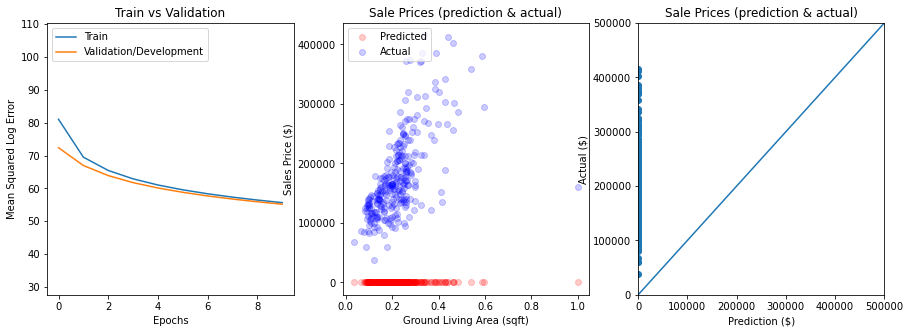

In [45]:
model,history,prediction,train_time = nn_single_layer(batch=10,epochs=10,verb=0)
accuracies_nn(model, history, train_data, dev_data, prediction, m=0)

#### Step 2a - Effect of Epochs and Batch Size
Increased to 1000 epochs and 5 batch which is about 220 iterations/steps (1168 samples) per epoch or a total of 220,000 steps.  
Result: MSLE=13.34 (improved but still high). Training time was 194 seconds, quite long!  

Script:  
model, history, prediction = nn_single_layer(batch=5, epochs=1000, verb=0)  
accuracies_nn(model, history, train_data, dev_data, prediction, m=0)

#### Step 2b - Effect of Epochs and Batch Size

Dropped to 100 epochs and 10 batch size -> about 10,000 iterations/steps total.  
Result: MSLE=24.7 (is better than previous model but worse than model with more iterations/steps). MSLE still bad overall.   
However, training time was only 13 seconds. Using less steps allow easier comparison of optimizers and activation functions  
Let's use 1, 10, 100 batches and 5,10 epochs to compare optimizers and activation functions.  

Script:  
model,history,prediction,train_time = nn_single_layer(batch=10, epochs=100, verb=0)  
accuracies_nn(model, history, train_data, dev_data, prediction, m=0)

#### Step 3 - Comparing Optimizers and Activation Functions

The cell below runs batches of 1, 10, and 100 with epochs of 5 and 10 while varying two optimizers and two activation functions.  Then plots a dataframe. 

Regarding Optimizers:  
In class we learned about SGD optimizers. On google, Adam was another recommended optimizer. Therefore, I wanted to compare the two. "Adam optimizer is a moment estimator but prefers flat minima in the error surface".  
Based on the results below, Adam optimizer always performs worse than SGD when using default learning rates. Finding the weights through backpropation may not lead to a lot of bouncing around or does not have a flat minima in the error surface.
SGD optimizer will be used for future models.  

Regarding Activation Functions:  
The table below shows that relu and linear activation performs similarly which make sense. relu is just a sloped line when house price is greater than 0 and zero otherwise. relu may actually be better to avoid any negative house price prediction.  Relu will be used.


In [46]:
# A function to store values of interest into a dictionary
def fill_in_comp(comp,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE):
    comp['Batch'].append(Batch)
    comp['Epochs'].append(Epochs)
    comp['Activation'].append(Activation)
    comp['Optimizer'].append(Optimizer)
    comp['Learning_Rate'].append(Learning_Rate)
    comp['Train_Time'].append(Train_Time)
    comp['MSLE'].append(MSLE)
    return comp

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.682
Optimizer: SGD, Activation: linear
Mean Squared Log Error: 44.57806312418999
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.776
Optimizer: Adam, Activation: linear
Mean Squared Log Error: 58.13532658430975
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 4.009
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 44.57814149942927
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 4.039
Optimizer: Adam, Activation: relu
Mean Squared Log Error: 57.745748477831235
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 10, Training Time: 6.993
Op

C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Batch Size: 100, Epochs: 10, Training Time: 0.833
Optimizer: Adam, Activation: linear
Mean Squared Log Error: 106.24842121315055
------------------------------------------------------------------------------------------


C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Batch Size: 100, Epochs: 10, Training Time: 0.776
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 72.17538025963496
------------------------------------------------------------------------------------------


C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Batch Size: 100, Epochs: 10, Training Time: 0.802
Optimizer: Adam, Activation: relu
Mean Squared Log Error: 109.79021324191075


C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


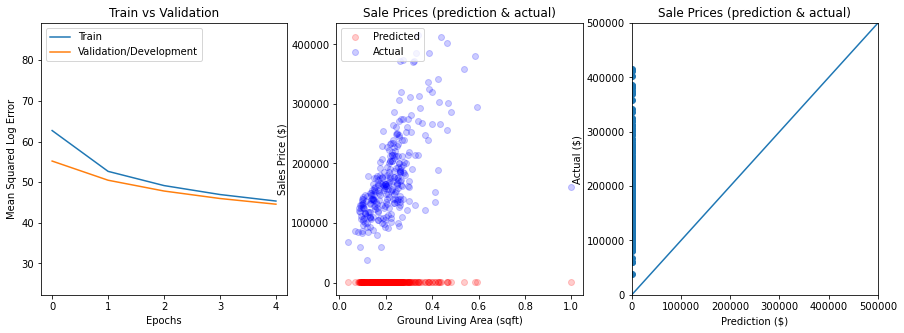

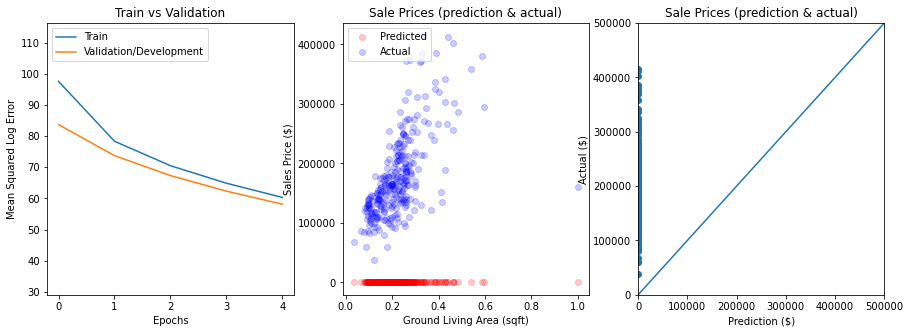

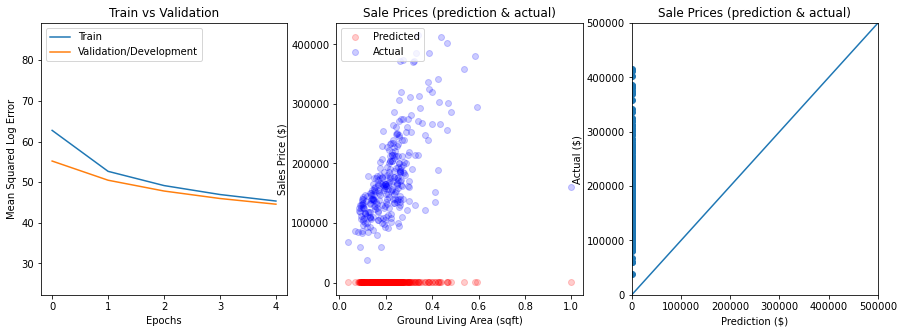

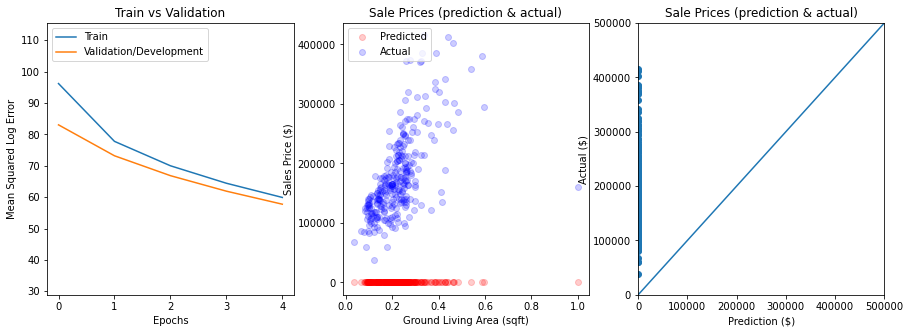

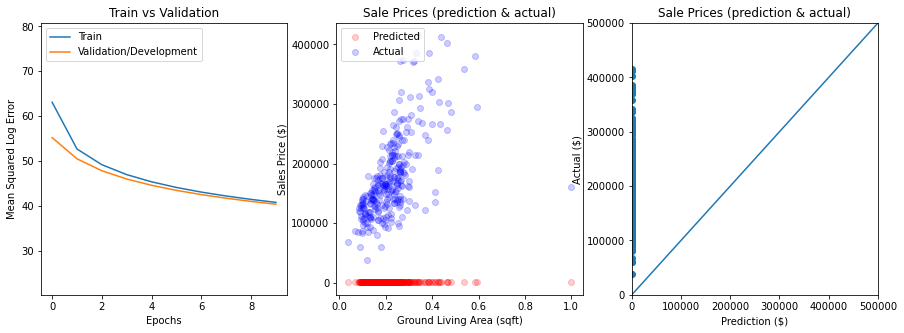

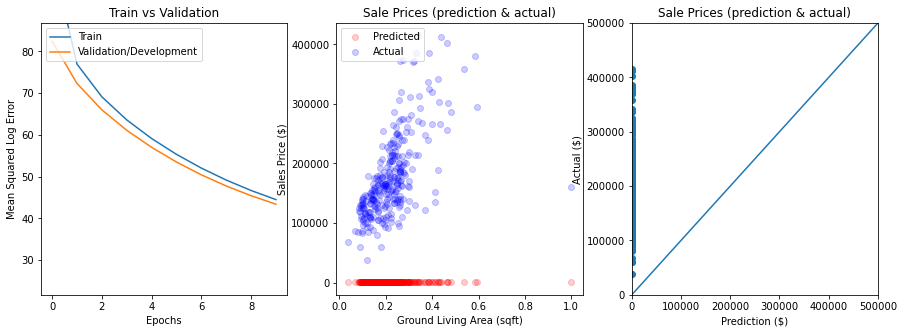

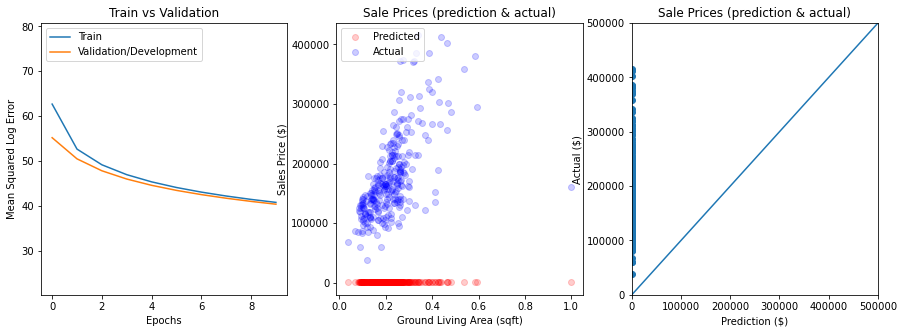

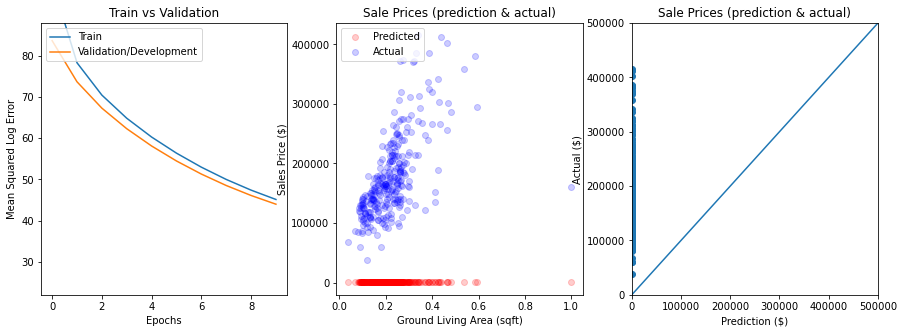

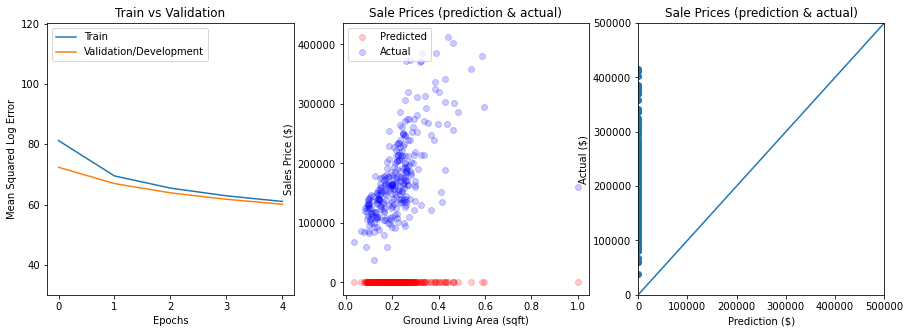

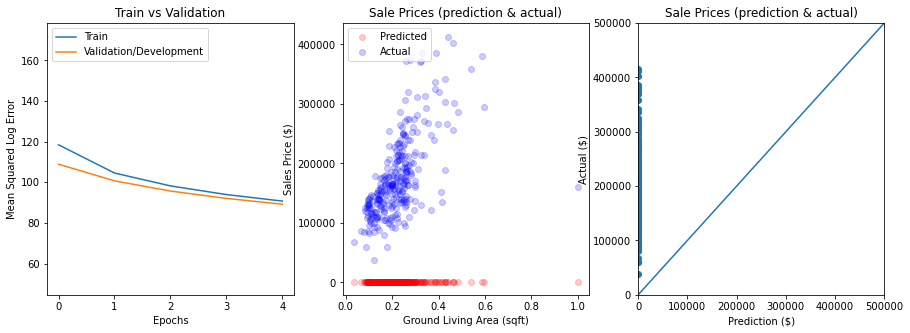

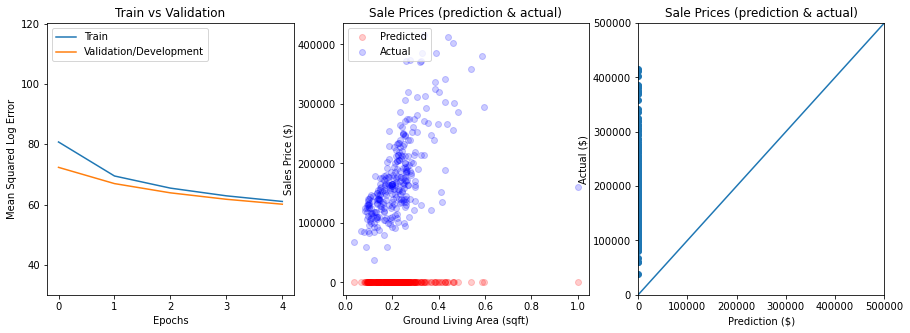

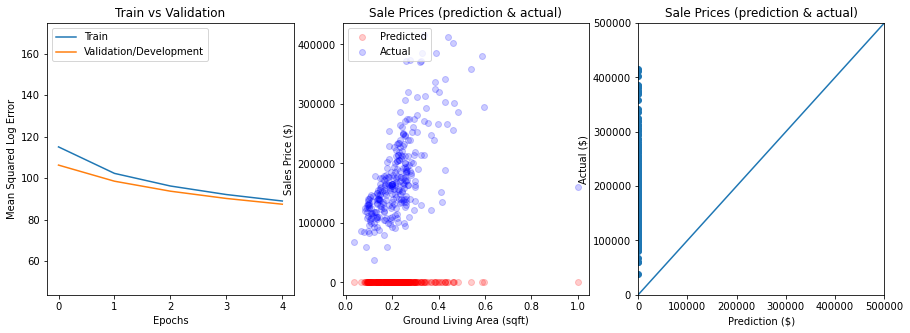

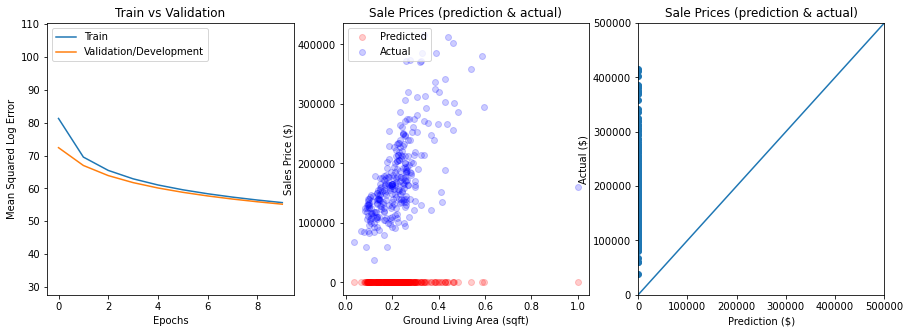

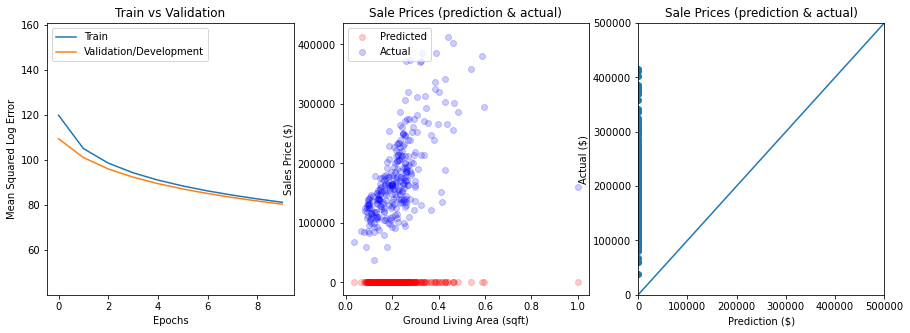

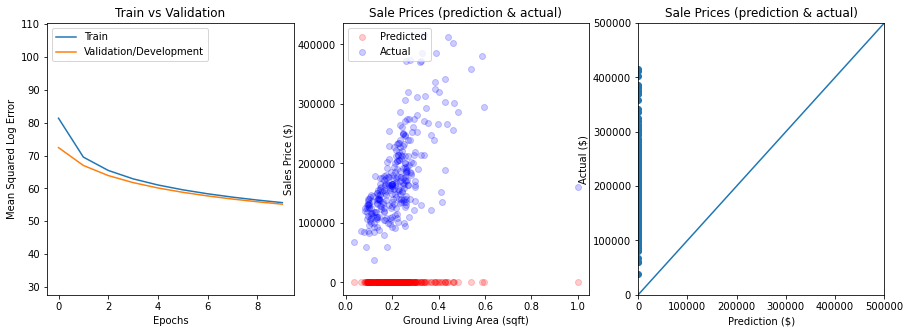

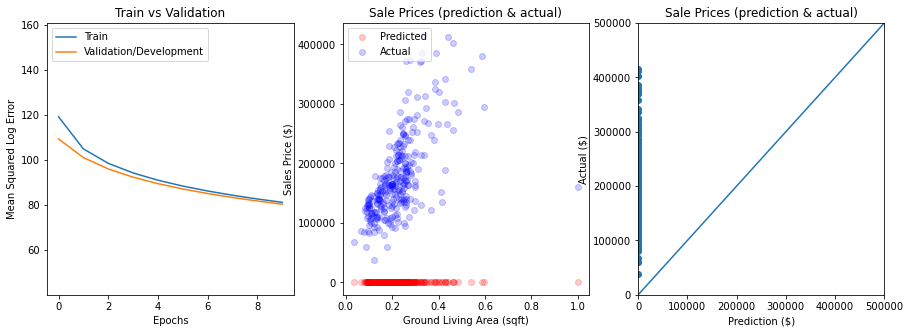

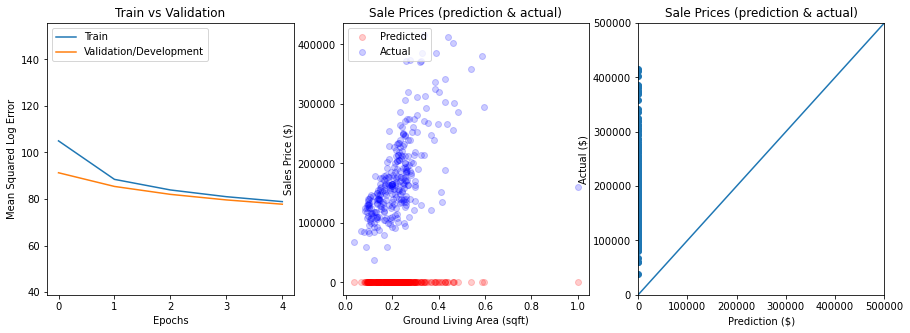

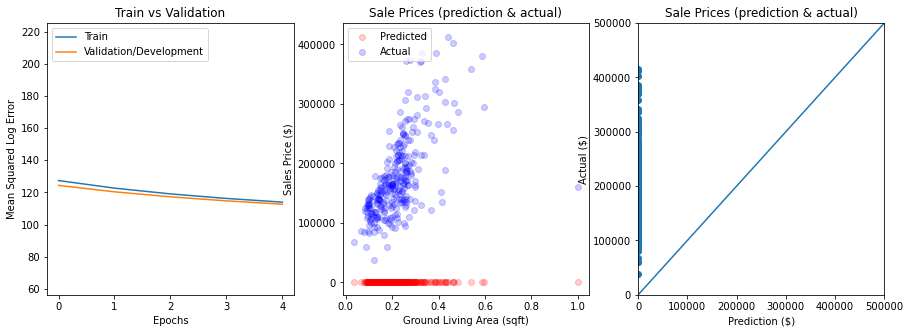

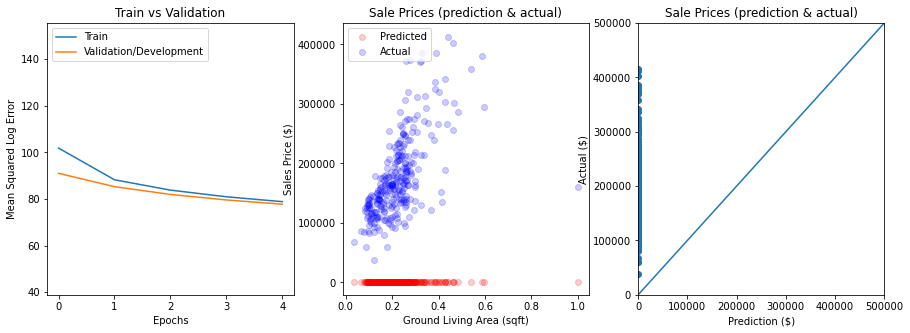

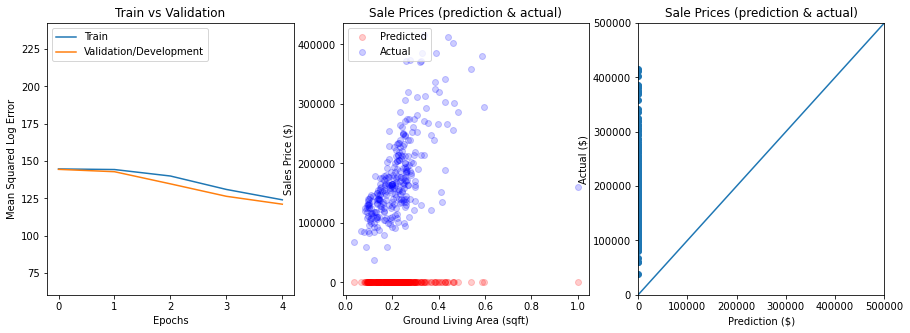

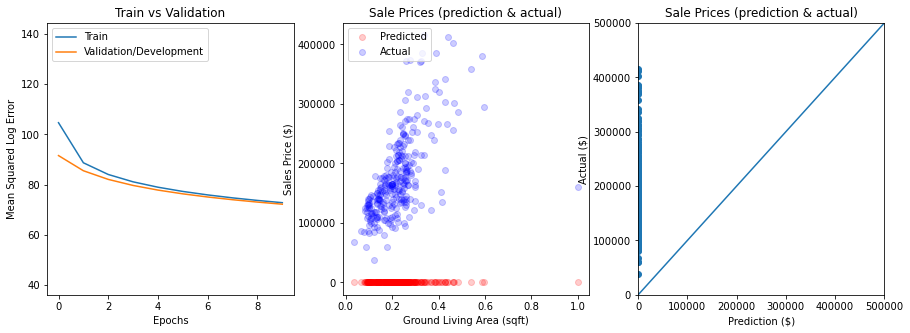

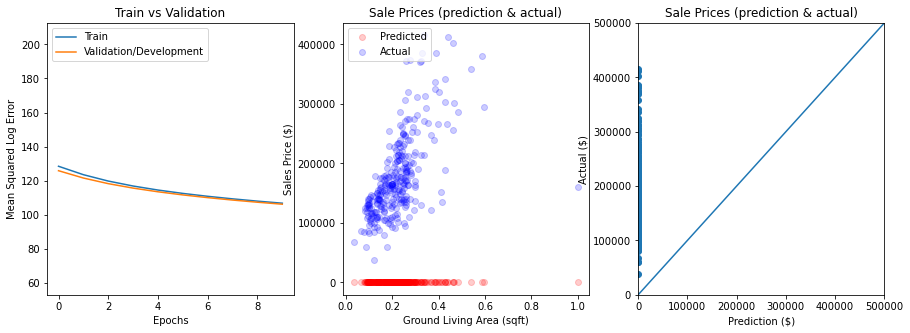

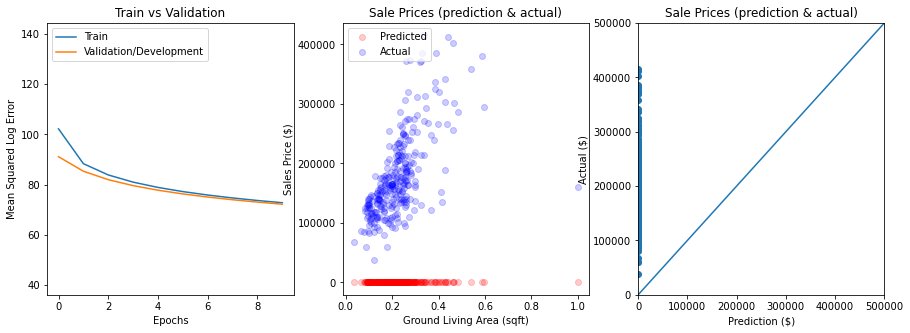

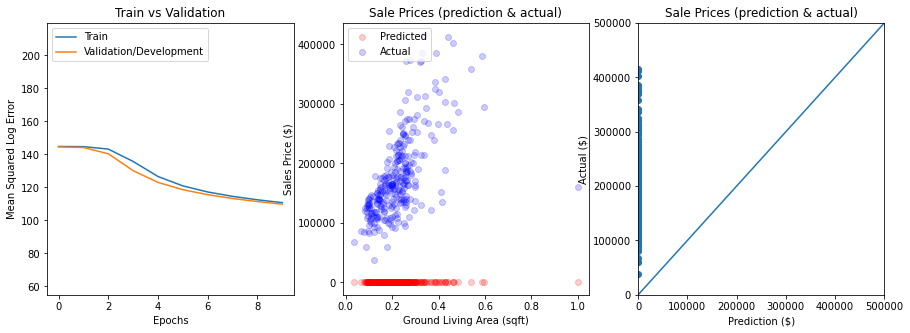

In [47]:
# Initiate a dictionary for plotting differences later
comp={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Vary Batch and Epochs Constant
batches=[1, 10, 100]
epochss=[5, 10]

for batch in batches:
    for epochs in epochss:

        # Activation: Linear / Optimizer: SGD    
        print("-"*90)
        act='linear'
        lr='default'
        opti=optimizers.SGD()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        accuracies_nn(model,train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

        # Activation: Linear / Optimizer: Adam
        print("-"*90)
        act='linear'
        lr='default'
        opti=optimizers.Adam()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

        # Activation: relu / Optimizer: SGD
        print("-"*90)
        act='relu'
        lr='default'
        opti=optimizers.SGD()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

        # Activation: relu / Optimizer: Adam
        print("-"*90)
        act='relu'
        lr='default'
        opti=optimizers.Adam()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)


In [48]:
comp_df=pd.DataFrame(comp, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])
comp_df

Batch  Epochs Activation Optimizer Learning_Rate  Train_Time        MSLE
0       1       5     linear       SGD       default    3.682035   44.578063
1       1       5     linear      Adam       default    3.776051   58.135327
2       1       5       relu       SGD       default    4.009326   44.578141
3       1       5       relu      Adam       default    4.039423   57.745748
4       1      10     linear       SGD       default    6.993008   40.373611
5       1      10     linear      Adam       default    7.761644   43.404768
6       1      10       relu       SGD       default    7.481287   40.374289
7       1      10       relu      Adam       default    7.751426   43.966196
8      10       5     linear       SGD       default    0.848398   60.115919
9      10       5     linear      Adam       default    0.971431   89.196877
10     10       5       relu       SGD       default    0.859003   60.113349
11     10       5       relu      Adam       default    0.937016   87.388844
12     10      10     linear       SGD       default    1.632810   55.183644
13     10      10     linear      Adam       default    1.549685   80.437456
14     10      10       relu       SGD       default    1.470840   55.189978
15     10      10       relu      Adam       default    1.564337   80.352068
16    100       5     linear       SGD       default    0.526383   77.798133
17    100       5     linear      Adam       default    0.571302  112.686607
18    100       5       relu       SGD       default    0.537897   77.742123
19    100       5       relu      Adam       default    0.562252  121.181307
20    100      10     linear       SGD       default    0.954761   72.209997
21    100      10     linear      Adam       default    0.833298  106.248421
22    100      10       relu       SGD       default    0.775536   72.175380
23    100      10       relu      Adam       default    0.802220  109.790213

#### Step 4 - Effect of Learning Rate  

Using SGD and Relu, we vary the learning rate of the optimizer, on only 5 epochs but 1 batch size.  This is 1168(samples) x 5 = 5840 steps. 

Results below showed that learning rate of 100 and 1000 produced decent MSLE for only 5 epochs. Note that sometimes, at different learning rates, MSLE would be really high (bad) which is possible for SGD because the slope could be bouncing too far and jump over the local minima. I assume this is more likely to happen when learning rate is high so we need to be careful.


------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 4.295
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 44.577930500051885
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.696
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 31.435879336207602
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.917
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 20.63320584591621
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.918
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 9.893148806853564
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 3.963
Optimize

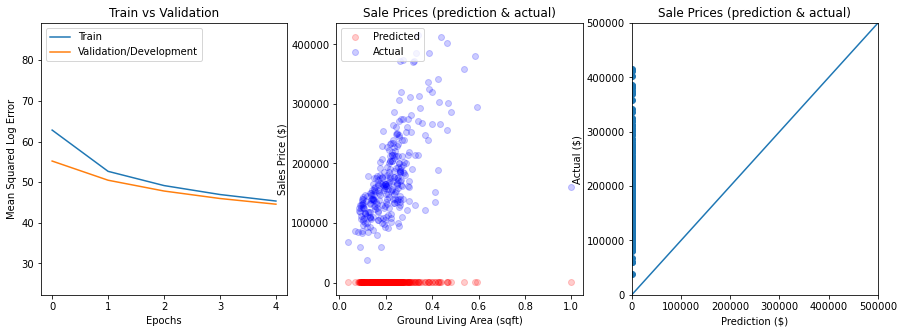

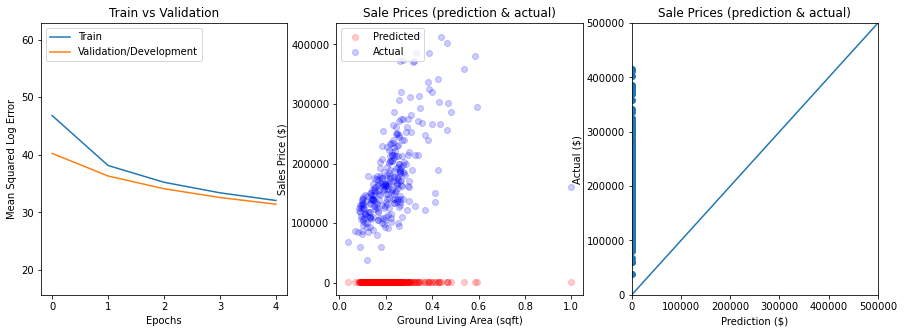

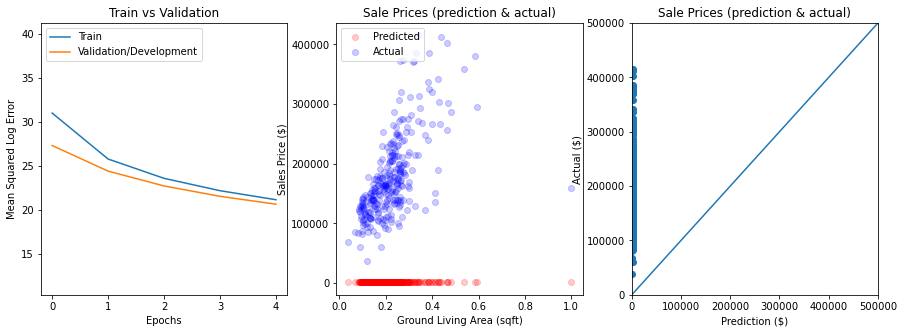

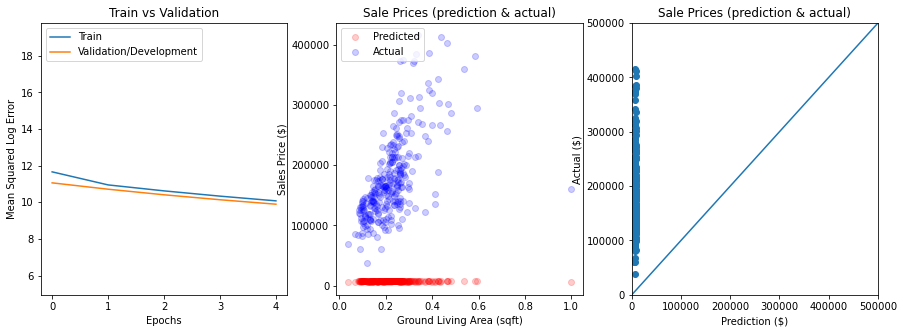

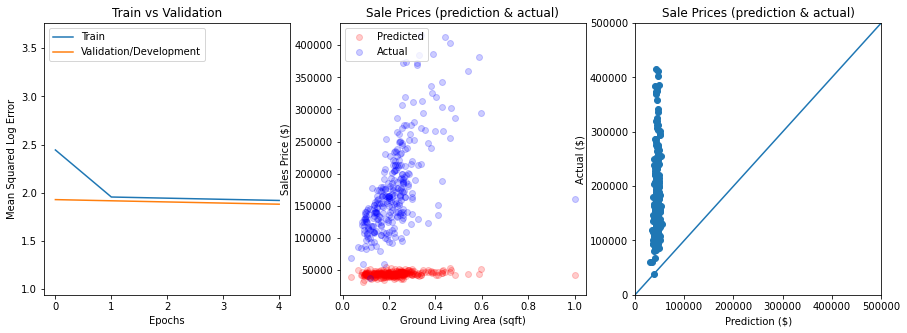

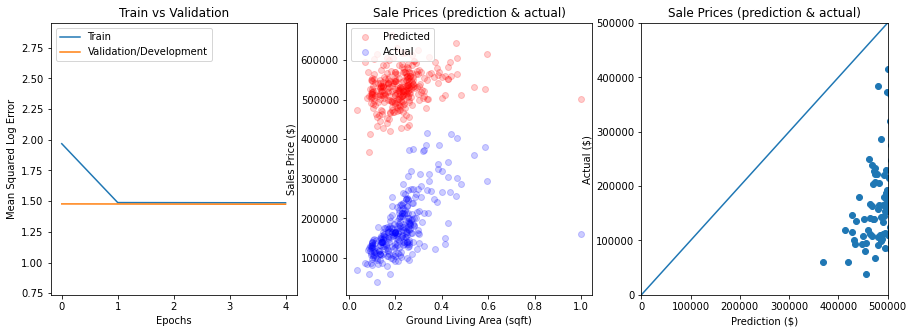

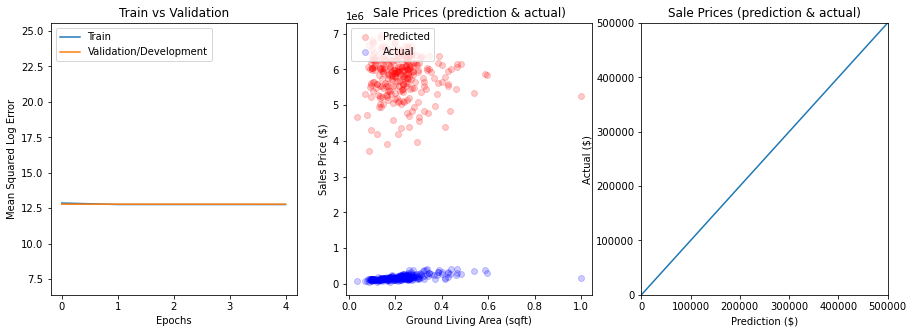

In [49]:
# Initiate a dictionary for plotting differences later
comp2={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Constant parameters
batch=1
epochs=5
act='relu'

# Vary Learning Rate:
learnrates=[0.01, 0.1, 1, 10, 100, 1000, 10000]

for lr in learnrates:
    print("-"*90)
    opti=optimizers.SGD(learning_rate=lr)
    model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
    accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
    msle=mean_squared_log_error(dev_labels, prediction)
    comp2 = fill_in_comp(comp2,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

In [50]:
comp2_df=pd.DataFrame(comp2, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])
comp2_df

Batch  Epochs Activation Optimizer  Learning_Rate  Train_Time       MSLE
0      1       5       relu       SGD           0.01    4.294666  44.577931
1      1       5       relu       SGD           0.10    3.696175  31.435879
2      1       5       relu       SGD           1.00    3.916868  20.633206
3      1       5       relu       SGD          10.00    3.917664   9.893149
4      1       5       relu       SGD         100.00    3.962940   1.880484
5      1       5       relu       SGD        1000.00    3.894528   1.475362
6      1       5       relu       SGD       10000.00    3.931994  12.781962

#### Step 5 - Effect of batch size  

Result below showed the MSLE bounce really high randomly, probably cause the learning rate is high. Regardless, it appears that training time decays exponentially. Batch size of 1 would take a long time, batch 10 would be much less time, but batch 20 wouldnt be that much less. Using Elbow method on the plot of training time, select batch size 10 for speed since MSLE are still all pretty high and can be corrected with more epochs.

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 5, Training Time: 4.043
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 3.084670539997237
------------------------------------------------------------------------------------------
Batch Size: 5, Epochs: 5, Training Time: 1.225
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 2.718638606803681
------------------------------------------------------------------------------------------
Batch Size: 10, Epochs: 5, Training Time: 0.892
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 4.44272932564863
------------------------------------------------------------------------------------------
Batch Size: 20, Epochs: 5, Training Time: 0.691
Optimizer: SGD, Activation: relu
Mean Squared Log Error: 4.146590897684673
------------------------------------------------------------------------------------------
Batch Size: 50, Epochs: 5, Training Time: 0.565
Optimize

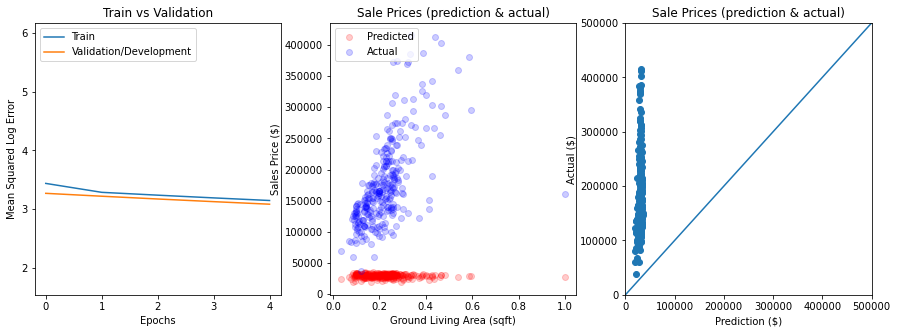

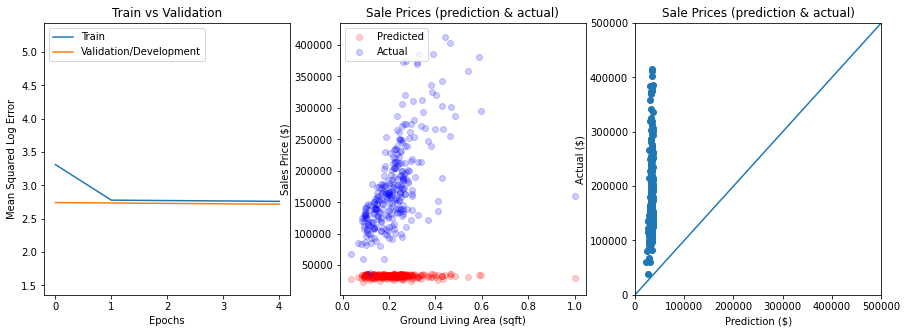

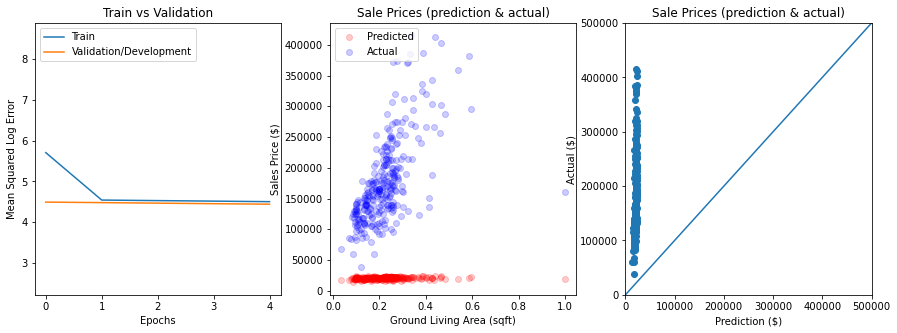

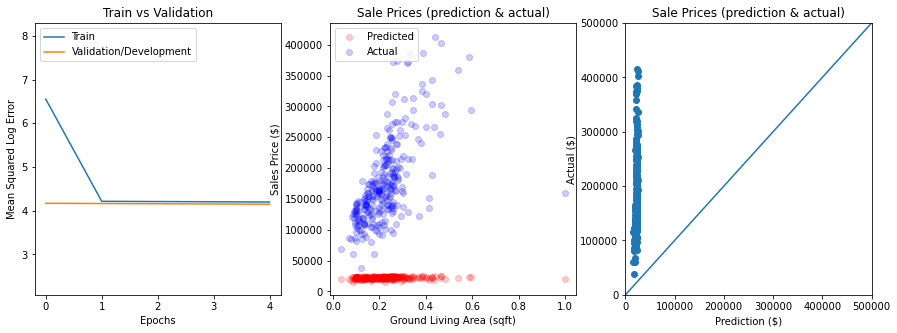

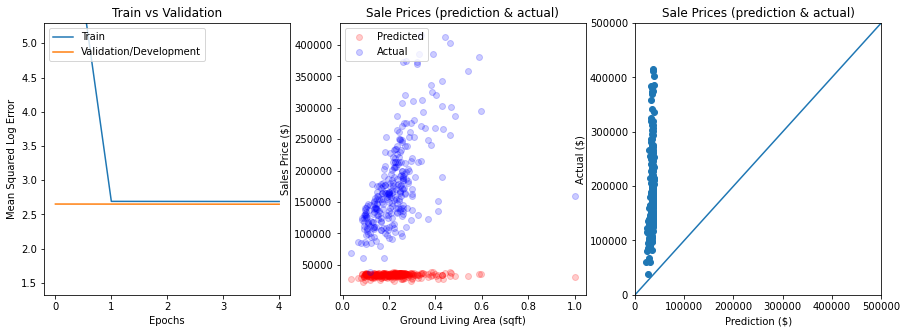

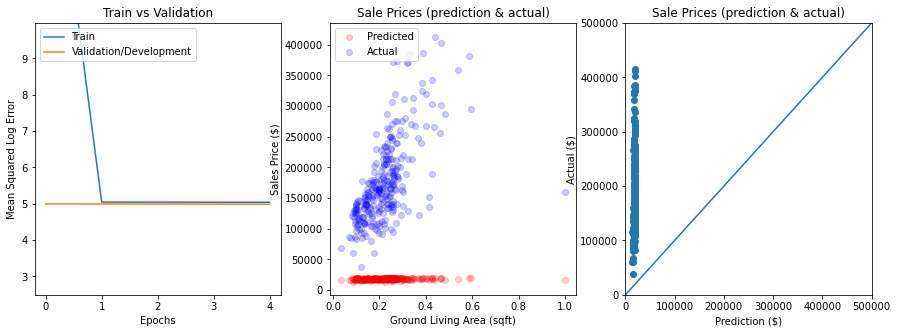

In [51]:
# Initiate a dictionary for plotting differences later
comp3={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Constant parameters
act='relu'
lr = 100
opti=optimizers.SGD(learning_rate=lr)
epochs=5

#Vary Batch size
batches = [1,5,10,20,50,100]

for batch in batches:
    print("-"*90)
    model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
    accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
    msle=mean_squared_log_error(dev_labels, prediction)
    comp3 = fill_in_comp(comp3,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

Batch  Epochs Activation Optimizer  Learning_Rate  Train_Time      MSLE
0      1       5       relu       SGD            100    4.043234  3.084671
1      5       5       relu       SGD            100    1.225369  2.718639
2     10       5       relu       SGD            100    0.891603  4.442729
3     20       5       relu       SGD            100    0.690757  4.146591
4     50       5       relu       SGD            100    0.565413  2.648347
5    100       5       relu       SGD            100    0.529667  4.987717

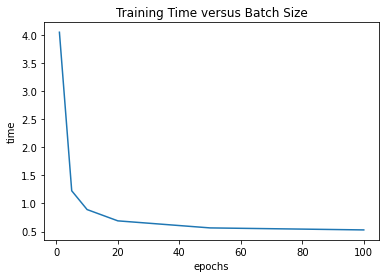

In [52]:
comp3_df=pd.DataFrame(comp3, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])
plt.plot(comp3_df['Batch'], comp3_df['Train_Time'])
plt.title('Training Time versus Batch Size')
plt.xlabel('epochs')
plt.ylabel('time')
comp3_df

#### Step 6 - Training Time versus Epochs  

The script below was used to determine the training time per epoch so I know how long I can be away from the computer. I did not include in the cell as I can explain the results here.  

Result: Training 100 epochs will take approximately 12.5 seconds based on linear regression model (which was pretty close!).

Script:  

` comp4={'Batch':[], 'Epochs':[], 'Activation':[], 'Optimizer':[], 'Learning_Rate':[], 'Train_Time':[],'MSLE':[]}  

act='relu'  
lr = 100  
batch = 10  
epochss=[1,5,10,20,50]  
for epochs in epochss:  
    opti=optimizers.SGD(learning_rate=lr)  
    model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)  
    accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)  
    msle=mean_squared_log_error(dev_labels, prediction)  
    comp4 = fill_in_comp(comp4,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)  
    
comp4_df=pd.DataFrame(comp4, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])  
plt.plot(comp4_df['Epochs'], comp4_df['Train_Time'])  
plt.plot(np.linspace(0,10), np.linspace(0,10))  
plt.xlabel('epochs')  
plt.ylabel('train time (sec)')  
plt.legend(['model', 'line with slope 1'])  

#Predict training time
lr = LinearRegression(fit_intercept=True) 
x=np.array(comp4['Epochs']).reshape(-1,1)  
y=np.array(comp4['Train_Time'])  
lr.fit(x,y)  
epoch_predict=[100,1000,2000,3000,5000,10000]  
prediction=lr.predict(np.array(epoch_predict).reshape(-1,1))  
print(prediction)  

for i in range(len(epoch_predict)):  
    new_row = {'Batch':'PREDICTION','Epochs':epoch_predict[i],'Activation':'N/A','Optimizer':'N/A',  
               'Learning_Rate':'N/A','Train_Time':prediction[i],'MSLE':'N/A'}   
    #append row to the dataframe  
    comp4_df = comp4_df.append(new_row, ignore_index=True)  
print(comp4_df)  

#### Step 7 - Running Models to Optimize MSLE

Now that we have some parameters, we can start running models with more epochs.  

Model 1:   
activation='relu', optimizer=SGD, learning rate=100 , batch=10  
5000 epochs returned an MSLE=0.525 which is high.  Took 600+ seconds too!  
I believe the learning rate was too high or there was no momentum in optimizer for SGD. Adam may actually be better... as opposed to our findings before. But maybe we can increase number of steps by decreasing batch size.

Model 2:  
activation='relu', optimizer=SGD, learning rate=1000 , batch=1  
1000 epochs returned an MSLE=0.67 which is wosre.  Took 738 seconds.   
LR might still be too high and missing the local minima for the weights.

#### Theory: Run model with lower learning rate so we do not miss the local minima. Need to increase epochs to hopefully reach convergence. Run model with adam optimizer, maybe this momentum optimizer would help speed things up.

Model:  
Activation: relu / Optimizer: Adam / Learning Rate: 0.02 / Batch size = 1 / Epochs = 10000
(Learning Rate of 0.02 is 10x the default optimizer)

Result:  
Mean Squared Log Error: 0.02571031041571618   
Training Time: 8008.020   
__MSLE is really low, Success! Will submit to kaggle__   
Kaggle Score: 0.16546

Dissusion:  
While MSLE was low, the training time took very long.  Analyzing the training versus validation/development MSLE versus Epochs plot, we can see that the model starts overfitting after 2500epochs where training MSLE continues to decrease while the validation/development data MSLE stops decreasing.    

            
Script:  
```act='relu'  
lr = 0.02  
batch = 1  
epochs = 10000  
opti=optimizers.Adam(learning_rate=lr)  

model2,history2,prediction2,train_time2 = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)  
accuracies_nn(model2, train_data=train_data, dev_data=dev_data, prediction=prediction2, history=history2, m=0)  
msle2=mean_squared_log_error(dev_labels, prediction2)  
comp4 = fill_in_comp(comp4,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time2,msle2)

#### Theory: To decrease training time, stop model when it starts to overfit. Per previous model, this was at 2500 epochs. 

Model:  
Activation: relu / Optimizer: Adam / Learning Rate: 0.02 / Batch size = 1 / Epochs = 2500
(Learning Rate of 0.02 is 10x the default optimizer)

Result:  
Mean Squared Log Error: 0.03914044220087549   
Training Time: 1866.401 
__MSLE is low still, will try a predict true test data and submit to kaggle as well__   
Kaggle score: 0.20330

Dissusion:  
Training time decreased by 6000 seconds. 
            
Script:
```act='relu'  
lr = 0.02  
batch = 1  
epochs = 2500  
opti=optimizers.Adam(learning_rate=lr)  

model3,history3,prediction3,train_time3 = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)  
accuracies_nn(model3, train_data=train_data, dev_data=dev_data, prediction=prediction3, history=history3, m=0)  
msle3=mean_squared_log_error(dev_labels, prediction3)  
comp4 = fill_in_comp(comp4,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time3,msle3)  

In [53]:
# SCRIPT TO STORE KERAS MODELS AFTER TRAINING

# from tensorflow.keras.models import model_from_json
# import os
# import pickle

# # serialize model to JSON
# nn_lay1_batch1_epochs10000_adamdot02_relu = model2.to_json()
# with open("saved_models\\nn_lay1_batch1_epochs10000_adamdot02_relu.json", "w") as json_file:
#     json_file.write(nn_lay1_batch1_epochs10000_adamdot02_relu)
# # serialize weights to HDF5
# model2.save_weights("saved_models\\nn_lay1_batch1_epochs10000_adamdot02_relu.h5")
# print("Saved model to disk")
# # save history to pickle
# with open('saved_models\\nn_lay1_batch1_epochs10000_adamdot02_relu_history', 'wb') as file_pi:
#         pickle.dump(history2.history, file_pi)

# # load json and create model
# json_file = open('saved_models\\nn_lay1_batch1_epochs10000_adamdot02_relu.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("saved_models\\nn_lay1_batch1_epochs10000_adamdot02_relu.h5")
# print("Loaded model from disk")
# # load history into new dictionary 
# loaded_history = pickle.load(open('saved_models\\nn_lay1_batch1_epochs10000_adamdot02_relu_history', 'rb'))
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [54]:
end_nn1l = time.time()
print("time to run Single Layer NN:", end_nn1l - start_nn)

time to run Single Layer NN: 118.40994930267334


## Multi-layer NN - 2 layers

In [55]:
start_nn2l=time.time()

In [56]:
#Function for Two Layer Neural Network with default parameters
def nn_two_layer(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time

# A function to store values into a dictionary
def fill_in_comp_2l(comp,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE,Hidden_Layer_Nodes):
    comp['Batch'].append(Batch)
    comp['Epochs'].append(Epochs)
    comp['Activation'].append(Activation)
    comp['Optimizer'].append(Optimizer)
    comp['Learning_Rate'].append(Learning_Rate)
    comp['Train_Time'].append(Train_Time)
    comp['MSLE'].append(MSLE)
    comp['Hidden_Layer_Nodes'].append(Hidden_Layer_Nodes)
    return comp

#### Step 1: Run a 2-layer NN with reasonable parameters

Use batch size 1 to update model often.  
Run for 100 epochs to hopefully see convergence.  
Select 5 hidden layer nodes b/c the features can be grouped in to 5 main categories: Type of neighborhood, Quality of house, Size of house, Type of house sale, and Appearance of house)  
Select relu for activation to avoid negative home prices. Although this hasn't happened.  
Select Adam optimizer to take advantage of momentum at each update step. Using a low learning rate would not jump over the local minima.  

Result: MSLE = 0.0251. 129 seconds training time. This is great because it already beat my single layer NN!  

Epoch 1/100
1168/1168 [==============================] - 1s 1ms/step - loss: 38.1450 - msle: 38.1450 - val_loss: 23.0516 - val_msle: 23.0516
Epoch 2/100
1168/1168 [==============================] - 1s 1ms/step - loss: 18.2185 - msle: 18.2185 - val_loss: 14.3620 - val_msle: 14.3620
Epoch 3/100
1168/1168 [==============================] - 1s 1ms/step - loss: 11.9413 - msle: 11.9413 - val_loss: 9.7357 - val_msle: 9.7357
Epoch 4/100
1168/1168 [==============================] - 1s 1ms/step - loss: 8.1817 - msle: 8.1817 - val_loss: 6.6831 - val_msle: 6.6831
Epoch 5/100
1168/1168 [==============================] - 1s 1ms/step - loss: 5.5956 - msle: 5.5956 - val_loss: 4.5138 - val_msle: 4.5138
Epoch 6/100
1168/1168 [==============================] - 1s 1ms/step - loss: 3.7350 - msle: 3.7350 - val_loss: 2.9441 - val_msle: 2.9441
Epoch 7/100
1168/1168 [==============================] - 1s 1ms/step - loss: 2.3936 - msle: 2.3936 - val_loss: 1.8246 - val_msle: 1.8246
Epoch 8/100
1168/1168 [========

1168/1168 [==============================] - 1s 1ms/step - loss: 0.0239 - msle: 0.0239 - val_loss: 0.0287 - val_msle: 0.0287
Epoch 61/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0237 - msle: 0.0237 - val_loss: 0.0285 - val_msle: 0.0285
Epoch 62/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0234 - msle: 0.0234 - val_loss: 0.0284 - val_msle: 0.0284
Epoch 63/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0231 - msle: 0.0231 - val_loss: 0.0282 - val_msle: 0.0282
Epoch 64/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0229 - msle: 0.0229 - val_loss: 0.0280 - val_msle: 0.0280
Epoch 65/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0227 - msle: 0.0227 - val_loss: 0.0278 - val_msle: 0.0278
Epoch 66/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.0224 - msle: 0.0224 - val_loss: 0.0277 - val_msle: 0.0277
Epoch 67/100
1168/1168 [=======================

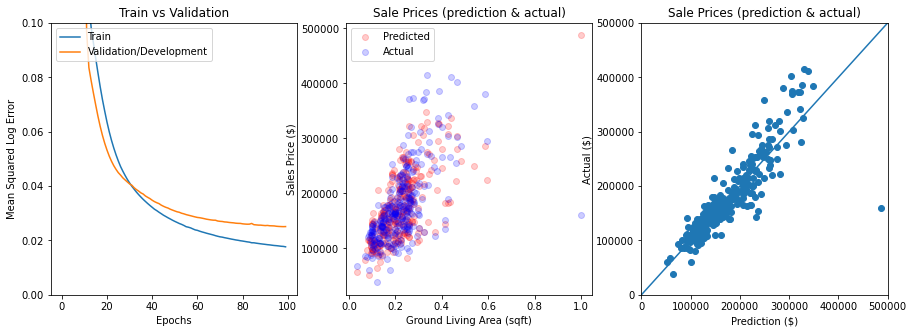

In [57]:
# Initiate a dictionary for plotting differences later
comp5={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Constant parameters
batch=1
epochs=100
hidden1_n=5
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

model_2l,history_2l,prediction_2l,train_time_2l = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 1, opti)
prediction_2l = model_2l.predict(dev_data)                 #predict
accuracies_nn(model_2l, history_2l, train_data, dev_data, prediction_2l, m=1, ylimit=0.1)

#### But can we improve model??

__Theory__ : Because we have a sparse training data set, using a small(er) amount of hidden layer nodes than original number of features should lead to a better model because you would gather the most important variances from the large number of features.  

Therefore, model was ran with varying hidden layer nodes, both less than and more than number of features in training data.    
It is confirmed that at smaller hidden layer nodes, the MSLE was lower (a better model).  However, 10 and 20 hidden layer nodes performed better than 5 hidden layer nodes.  

What was interesting and not shown below is that when I tried using a smaller learning rate of 0.001 (instead of 0.01, it showed that higher nodes performed better (1000 nodes performed better than 5 nodes,etc...). This could be that the model has already converged early on in a few epochs rather than the 100 epochs that was ran. Therefore at the end of the 100 epochs, the results were just showing fluctuations in the convergence and somehow more hidden nodes produced lower MSLE than less nodes.  

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 83.286
Optimizer: Adam, Activation: relu
Hidden Layer Features: 5
Mean Squared Log Error: 0.08497137135206406
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 87.386
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.06329908914075898
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 93.563
Optimizer: Adam, Activation: relu
Hidden Layer Features: 50
Mean Squared Log Error: 0.040778556131906556
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 88.680
Optimizer: Adam, Activation: relu
Hidden Layer Features: 100
Mean Squared Log Error: 0.03259310498047477
-------------------

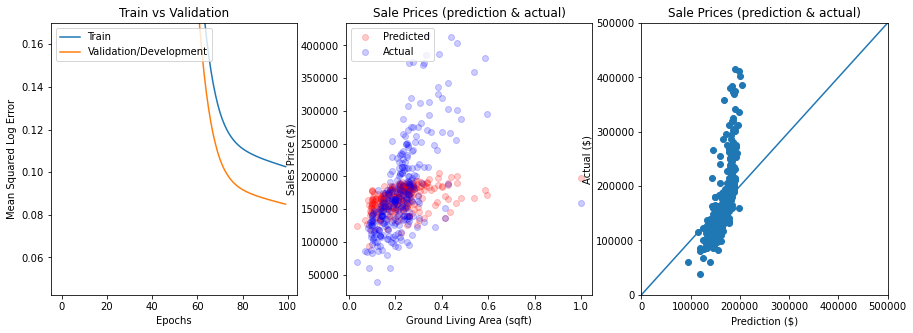

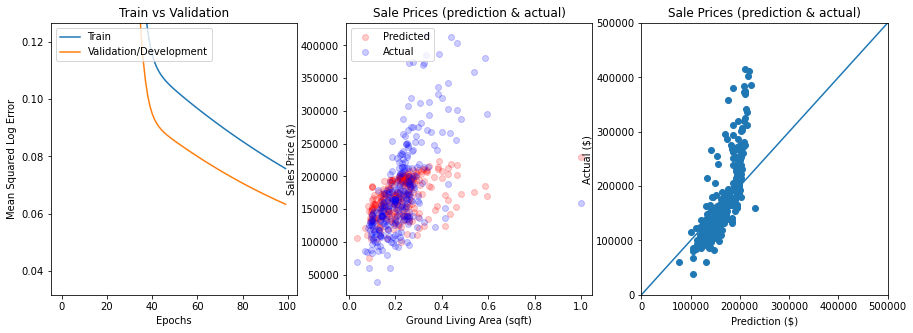

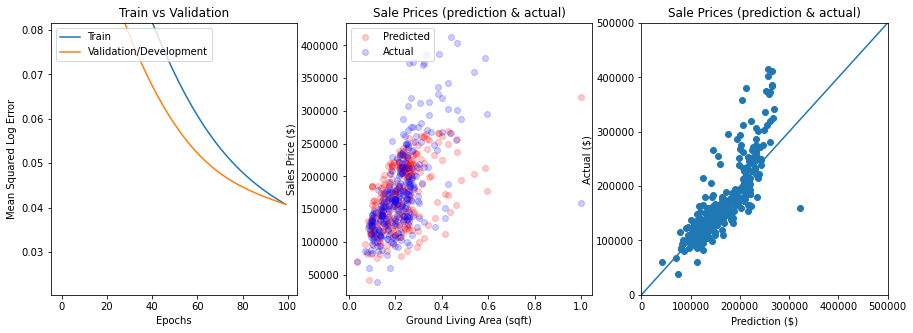

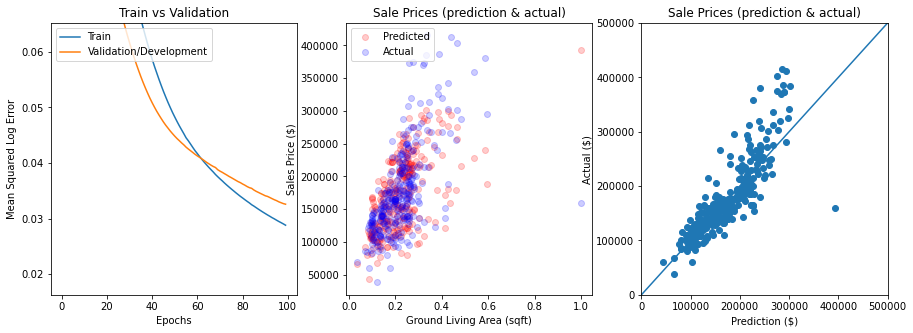

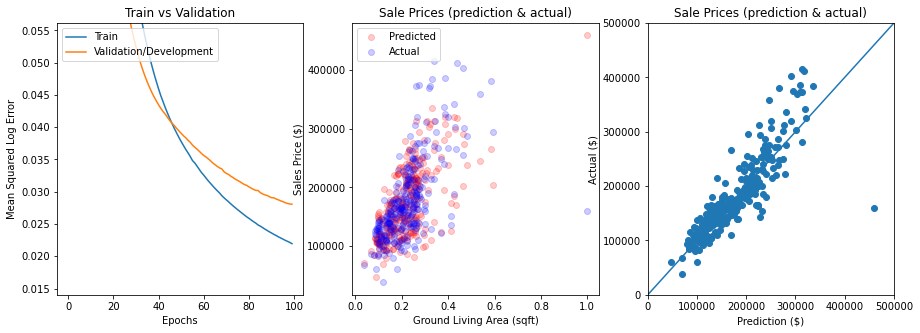

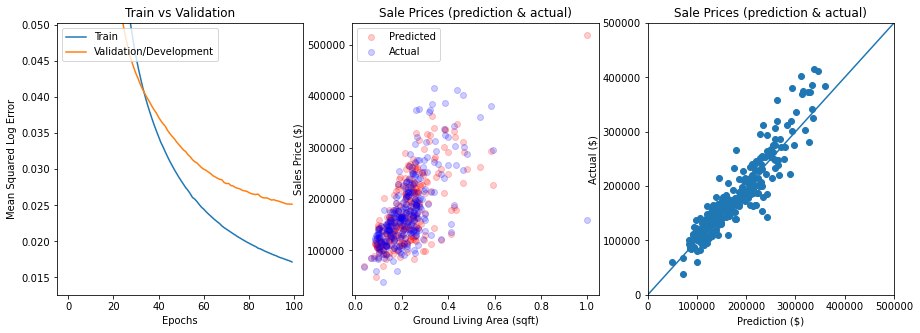

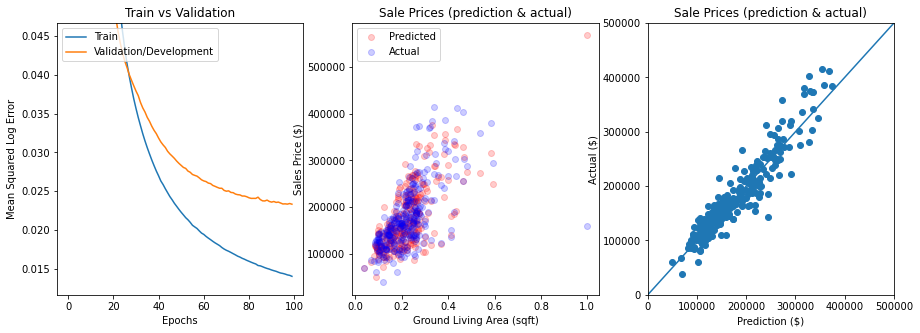

In [58]:
# Initiate a dictionary for plotting differences later
comp5={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[], 'Hidden_Layer_Nodes':[]}

#Constant parameters
batch=1
epochs=100
hidden1_ns=[5,10,50,100,222,500,1000]
act1='relu'
act2='relu'
lr=0.001
opti=optimizers.Adam(learning_rate=lr)

for hidden1_n in hidden1_ns:
    print("-"*90)
    model_2l2,history_2l2,prediction_2l2,train_time_2l2 = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti)
    prediction_2l2 = model_2l2.predict(dev_data)                 #predict
    accuracies_nn(model_2l2, history_2l2, train_data, dev_data, prediction_2l2, m=0, ylimit=0)
    msle=mean_squared_log_error(dev_labels, prediction_2l2)
    comp5 = fill_in_comp_2l(comp5,batch,epochs,act1,str(opti).split('.')[5].split(' ')[0],lr,train_time_2l2,msle,hidden1_n)

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 84.951
Optimizer: Adam, Activation: relu
Hidden Layer Features: 5
Mean Squared Log Error: 0.024419768774294845
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 85.402
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.022783489165645196
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 88.599
Optimizer: Adam, Activation: relu
Hidden Layer Features: 50
Mean Squared Log Error: 0.02354496578049939
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 88.465
Optimizer: Adam, Activation: relu
Hidden Layer Features: 100
Mean Squared Log Error: 0.025489833557207454
-----------------

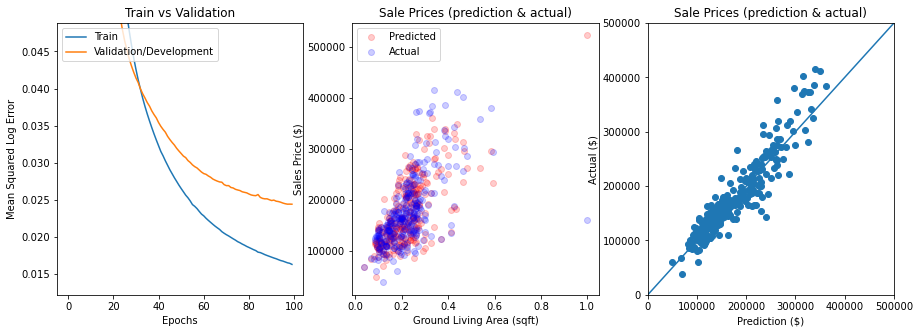

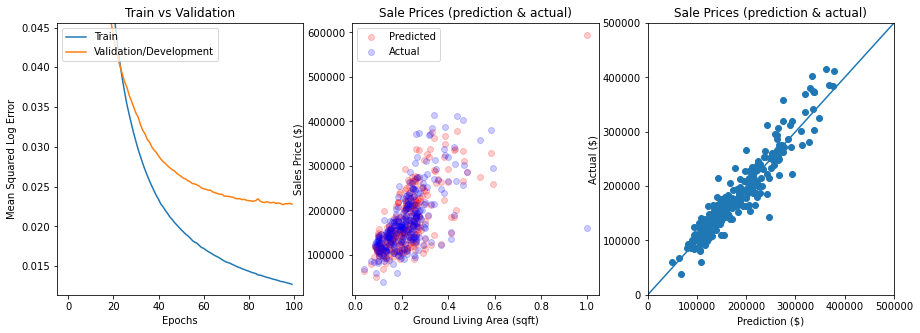

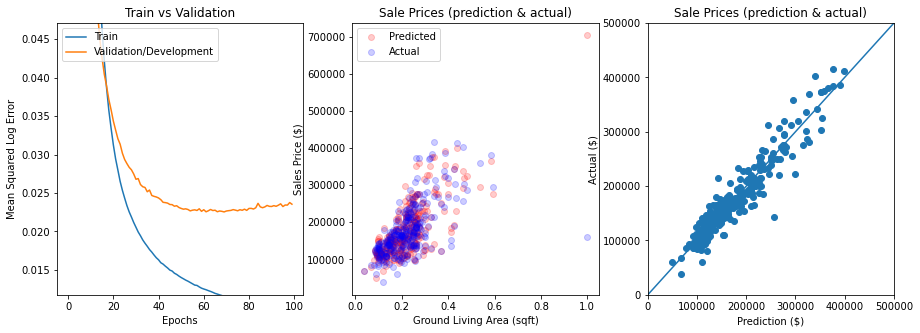

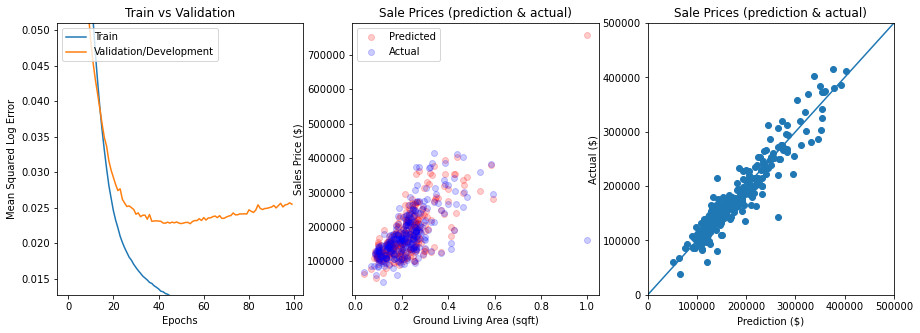

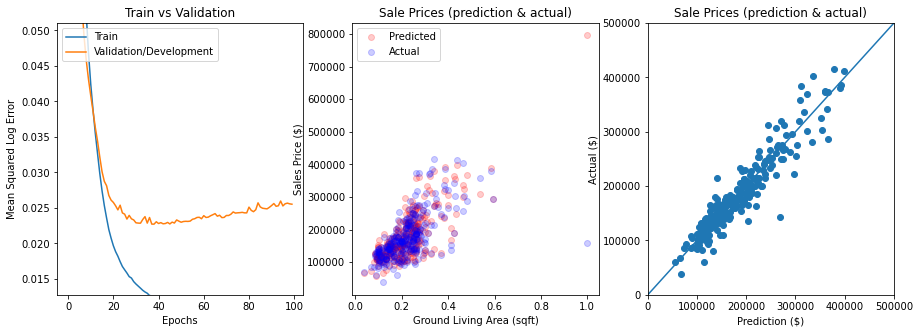

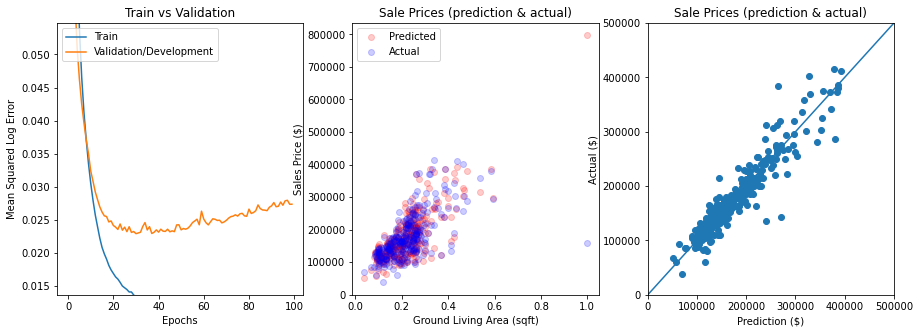

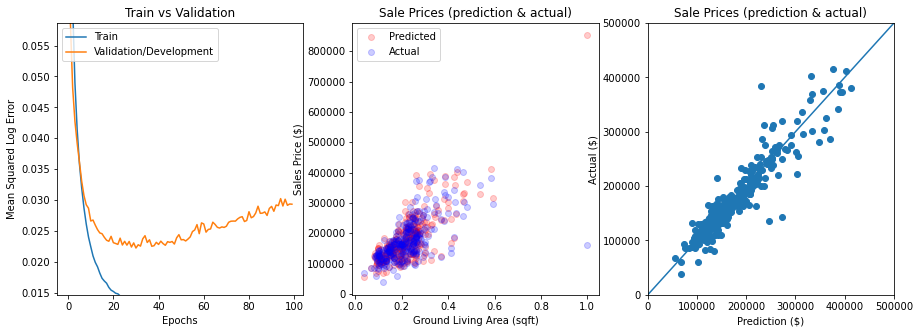

In [59]:
#Constant parameters
batch=1
epochs=100
hidden1_ns=[5,10,50,100,222,500,1000]
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

for hidden1_n in hidden1_ns:
    print("-"*90)
    model_2l2,history_2l2,prediction_2l2,train_time_2l2 = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti)
    prediction_2l2 = model_2l2.predict(dev_data)                 #predict
    accuracies_nn(model_2l2, history_2l2, train_data, dev_data, prediction_2l2, m=0, ylimit=0)
    msle=mean_squared_log_error(dev_labels, prediction_2l2)
    comp5 = fill_in_comp_2l(comp5,batch,epochs,act1,str(opti).split('.')[5].split(' ')[0],lr,train_time_2l2,msle,hidden1_n)

In [60]:
comp5_df=pd.DataFrame(comp5, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate',
                                      'Train_Time','MSLE','Hidden_Layer_Nodes'])
comp5_df

Batch  Epochs Activation Optimizer  Learning_Rate  Train_Time      MSLE  \
0       1     100       relu      Adam          0.001   83.286231  0.084971   
1       1     100       relu      Adam          0.001   87.385992  0.063299   
2       1     100       relu      Adam          0.001   93.562607  0.040779   
3       1     100       relu      Adam          0.001   88.680313  0.032593   
4       1     100       relu      Adam          0.001   93.288724  0.028066   
5       1     100       relu      Adam          0.001  115.549547  0.025154   
6       1     100       relu      Adam          0.001  146.907455  0.023335   
7       1     100       relu      Adam          0.010   84.950698  0.024420   
8       1     100       relu      Adam          0.010   85.402158  0.022783   
9       1     100       relu      Adam          0.010   88.599480  0.023545   
10      1     100       relu      Adam          0.010   88.465122  0.025490   
11      1     100       relu      Adam          0.010   92.494951  0.025524   
12      1     100       relu      Adam          0.010  112.706807  0.027379   
13      1     100       relu      Adam          0.010  148.095309  0.029321   

    Hidden_Layer_Nodes  
0                    5  
1                   10  
2                   50  
3                  100  
4                  222  
5                  500  
6                 1000  
7                    5  
8                   10  
9                   50  
10                 100  
11                 222  
12                 500  
13                1000

In [61]:
# NOT NEEDED but keep code if I change my mind
# Double checking table above with hidden layer nodes = 1000 and 10

# #Constant parameters
# batch=1
# epochs=100
# act1='relu'
# act2='relu'
# lr=0.01
# opti=optimizers.Adam(learning_rate=lr)

# print("-"*90)
# hidden1_n=1000
# model_2l2,history_2l2,prediction_2l2,train_time_2l2 = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti)
# accuracies_nn(model_2l2, history_2l2, train_time_2l2, dev_data, prediction_2l2, m=0, ylimit=0.1)

# print("-"*90)
# hidden1_n=10
# model_2l3,history_2l3,prediction_2l3,train_time_2l3 = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti)
# accuracies_nn(model_2l3, history_2l3, train_time_2l3, dev_data, prediction_2l3, m=0, ylimit=0.5)

#### Confirming theory of less nodes improving the model

__Theory__ If less hidden layer nodes improve the model, less feature information could make model better. 

We will use "drop out" to set random features to 0 weights, essentially dropping out some nodes.

We will also separately run L1 regularization to see if removing the least important features will improve the model.  

If both actually improve model, we will combine them.  

Result:  
Dropout and L1 and L2 regularization did not improve the model.  This would mean that all features are important in helping predict the sales price of a home.  
Another result for L1 or L2 regularization. If applied on input layer, performed worse than L1 or L2 regularization on the hidden layer. It means that the information from the 222 input features were all important whereas the hidden layer, there may be some features that were not important. If applied on both layers, it performed worst.

Future models will not utilize dropout or regularization unless there appears to be overfitting.   

Batch Size: 1, Epochs: 100, Training Time: 83.987
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.02349585686757268


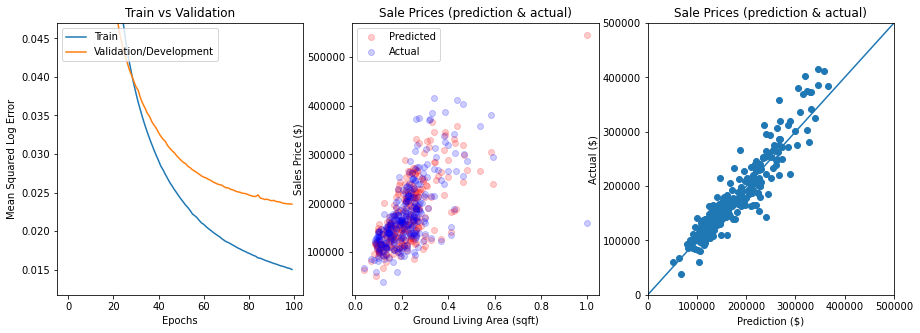

In [62]:
#Create new function for storing a new dataframe with interesting conditions.
def fill_in_comp_2l2(comp,Batch,Epochs,Dropout,L1Reg,L2Reg,Train_Time,MSLE,Hidden_Layer_Nodes):
    comp['Batch'].append(Batch)
    comp['Epochs'].append(Epochs)
    comp['Dropout'].append(Dropout)
    comp['L1Reg'].append(L1Reg)
    comp['L2Reg'].append(L2Reg)
    comp['Train_Time'].append(Train_Time)
    comp['MSLE'].append(MSLE)
    comp['Hidden_Layer_Nodes'].append(Hidden_Layer_Nodes)
    return comp

# Initiate a dictionary for plotting differences later
comp6={'Batch':[], 'Epochs':[], 'Dropout':[], 'L1Reg':[], 'L2Reg':[], 
      'Train_Time':[],'MSLE':[], 'Hidden_Layer_Nodes':[]}

#Base Model for comparing to models with dropout, L1 and L2 models. 

#Constant parameters for all of following models.
batch=1
epochs=100
hidden1_n=10
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='No'

model_2lb,history_2lb,prediction_2lb,train_time_2lb = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti) #train model
accuracies_nn(model_2lb, history_2lb, train_data, dev_data, prediction_2lb, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2lb)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg,L2Reg,train_time_2lb,msle,hidden1_n)

Batch Size: 1, Epochs: 100, Training Time: 88.644
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.04252743471348559


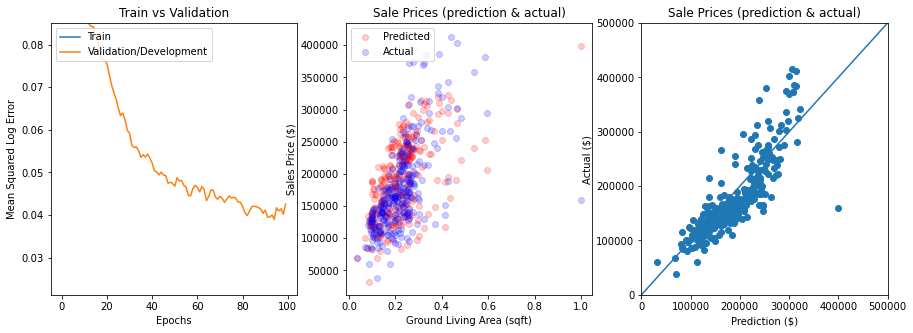

In [63]:
def nn_two_layer_dropout(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', 
                         verb=0, opti=optimizers.SGD(), dropout=dropout): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time

#Varying parameters for each model
dropout=0.5
L1Reg='No'
L2Reg='No'

model_2ld,history_2ld,prediction_2ld,train_time_2ld = nn_two_layer_dropout(batch, epochs, hidden1_n, 
                                                                           act1, act2, 0, opti, dropout)
accuracies_nn(model_2ld, history_2ld, train_data, dev_data, prediction_2ld, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ld)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 85.351
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.1397595787019585
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 85.647
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.06682948574073952
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 83.258
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.36939658528914976


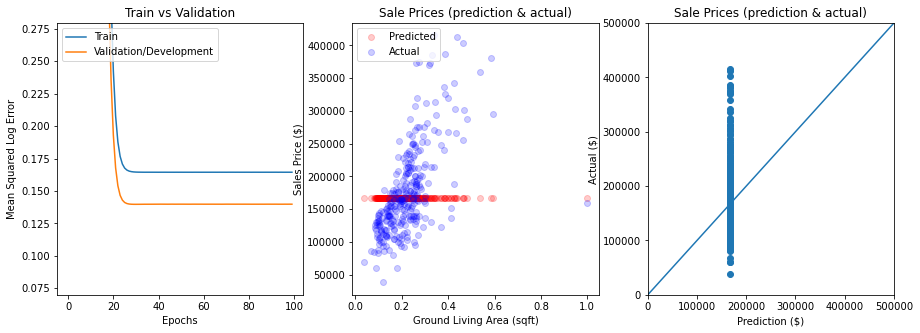

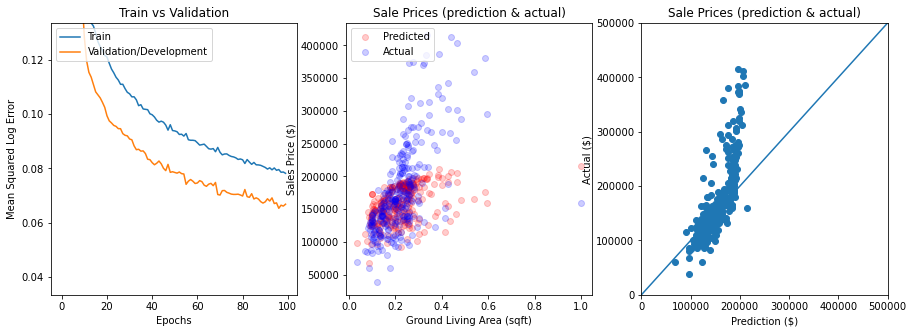

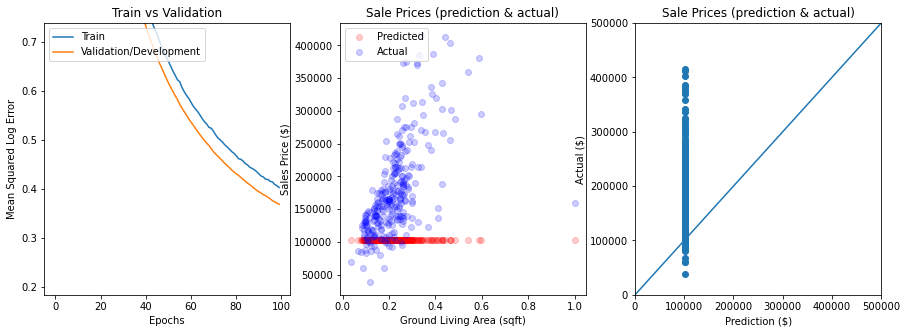

In [64]:
def nn_two_layer_l1reg(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', 
                       verb=0, opti=optimizers.SGD(), order=0): 
    
    if order == '1st Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l1(0.01)))
        model.add(Dense(1, activation = act2))
    if order == '2nd Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l1(0.01)))
    if order == 'Both Layers':      
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l1(0.01)))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l1(0.01)))
        
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


#Varying parameters for each model
dropout='No'
L1Reg='1st Layer'
L2Reg='No'
print("-"*90)
model_2ll1r,history_2ll1r,prediction_2ll1r,train_time_2ll1r = nn_two_layer_l1reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L1Reg)
accuracies_nn(model_2ll1r, history_2ll1r, train_data, dev_data, prediction_2ll1r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll1r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='2nd Layer'
L2Reg='No'
print("-"*90)
model_2ll1r,history_2ll1r,prediction_2ll1r,train_time_2ll1r = nn_two_layer_l1reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L1Reg)
accuracies_nn(model_2ll1r, history_2ll1r, train_data, dev_data, prediction_2ll1r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll1r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='Both Layers'
L2Reg='No'
print("-"*90)
model_2ll1r,history_2ll1r,prediction_2ll1r,train_time_2ll1r = nn_two_layer_l1reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L1Reg)
accuracies_nn(model_2ll1r, history_2ll1r, train_data, dev_data, prediction_2ll1r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll1r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 87.272
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.13956443014045322
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 82.883
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.09628675388731164
------------------------------------------------------------------------------------------
Batch Size: 1, Epochs: 100, Training Time: 85.166
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 4.122699468888025


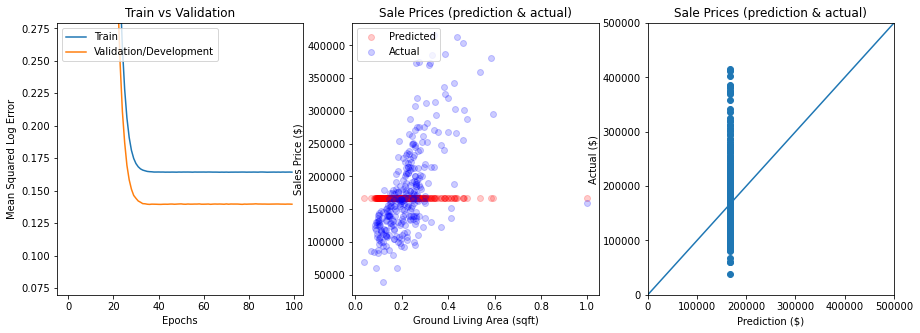

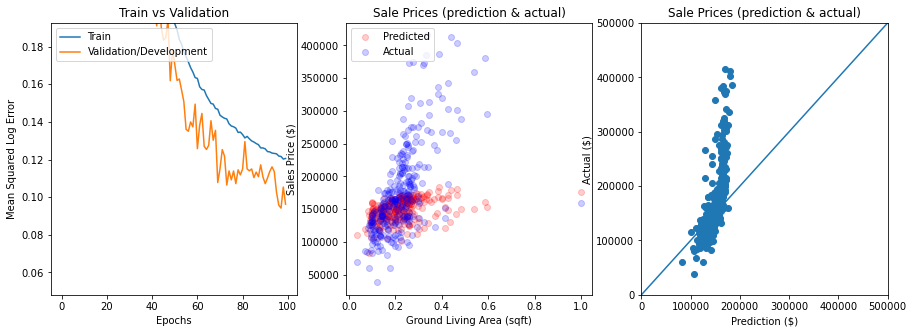

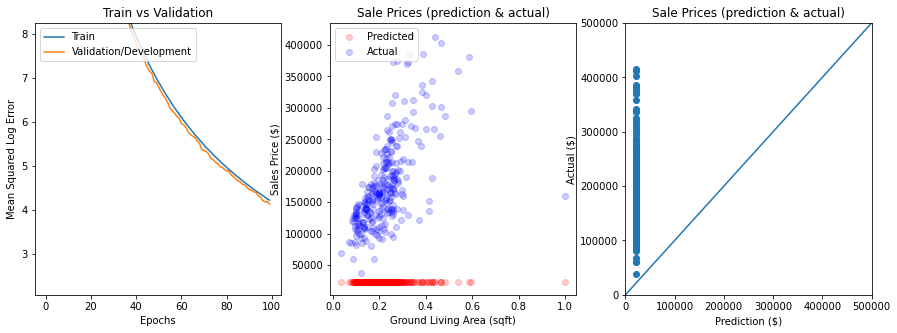

In [65]:
def nn_two_layer_l2reg(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', 
                       verb=0, opti=optimizers.SGD(), order=0): 
    
    if order == '1st Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dense(1, activation = act2))
    if order == '2nd Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l2(0.01)))
    if order == 'Both Layers':      
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l2(0.01)))
        
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='1st Layer'
print("-"*90)
model_2ll2r,history_2ll2r,prediction_2ll2r,train_time_2ll2r = nn_two_layer_l2reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L2Reg)
accuracies_nn(model_2ll2r, history_2ll2r, train_data, dev_data, prediction_2ll2r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll2r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ll2r,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='2nd Layer'
print("-"*90)
model_2ll2r,history_2ll2r,prediction_2ll2r,train_time_2ll2r = nn_two_layer_l2reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L2Reg)
accuracies_nn(model_2ll2r, history_2ll2r, train_data, dev_data, prediction_2ll2r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll2r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ll2r,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='Both Layers'
print("-"*90)
model_2ll2r,history_2ll2r,prediction_2ll2r,train_time_2ll2r = nn_two_layer_l2reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L2Reg)
accuracies_nn(model_2ll2r, history_2ll2r, train_data, dev_data, prediction_2ll2r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll2r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ll2r,msle,hidden1_n)

In [66]:
comp6_df=pd.DataFrame(comp6, columns=['Batch','Epochs','Dropout','L1Reg','L2Reg',
                                      'Train_Time','MSLE','Hidden_Layer_Nodes'])
comp6_df

Batch  Epochs Dropout        L1Reg        L2Reg  Train_Time      MSLE  \
0      1     100      No           No           No   83.986970  0.023496   
1      1     100     0.5           No           No   88.644336  0.042527   
2      1     100      No    1st Layer           No   88.644336  0.139760   
3      1     100      No    2nd Layer           No   88.644336  0.066829   
4      1     100      No  Both Layers           No   88.644336  0.369397   
5      1     100      No           No    1st Layer   87.271813  0.139564   
6      1     100      No           No    2nd Layer   82.883327  0.096287   
7      1     100      No           No  Both Layers   85.166055  4.122699   

   Hidden_Layer_Nodes  
0                  10  
1                  10  
2                  10  
3                  10  
4                  10  
5                  10  
6                  10  
7                  10

#### Final 2 layer neural network

10 hidden node versus 1000 hidden nodes. Without Dropout or regularization.  
Lower learning rate so that we can slow down the gradient descent and not jump over local minimas.  
Increase batch size from 1 to 10 so that the direction of descent doesn't move too far away each time.    
Increase epochs from 100 to 1000 to do more iterations to compensate for lower learning rate and larger batch size. More iterations will increase convergence but at the expense of time.   

Batch Size: 1, Epochs: 100, Training Time: 83.635
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.02391135678820195


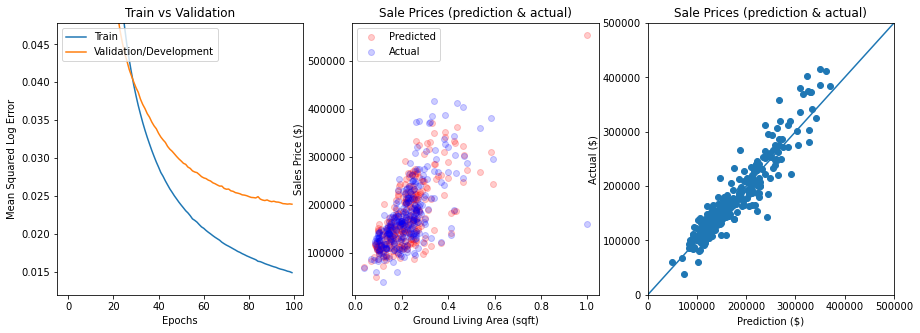

In [67]:
batch=1
epochs=100
hidden1_n=10
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

#Function for Two Layer Neural Network with default parameters
def nn_two_layer(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


final_2l_model,final_2l_history,final_2l_prediction,final_2l_train_time = nn_two_layer(batch, epochs, hidden1_n, 
                                                                           act1, act2, 0, opti)
accuracies_nn(final_2l_model, final_2l_history, train_data, dev_data, final_2l_prediction, m=0, ylimit=0)


(0.0, 0.3)

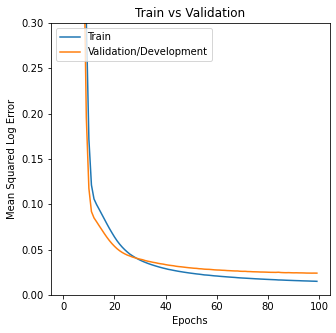

In [68]:
#Plotting
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
ax1.set_title('Train vs Validation')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Mean Squared Log Error')
ax1.plot(final_2l_history.history['msle'])
ax1.plot(final_2l_history.history['val_msle'])
ax1.legend(['Train', 'Validation/Development'],loc='upper left') 
ax1.set_ylim(0,0.3)

Batch Size: 10, Epochs: 1000, Training Time: 134.873
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.025901776660301933


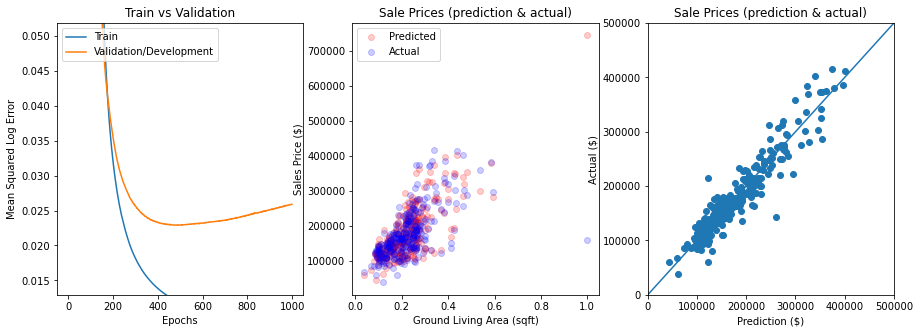

In [69]:
batch=10
epochs=1000
hidden1_n=10
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

#Function for Two Layer Neural Network with default parameters
def nn_two_layer(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


final_2l_model,final_2l_history,final_2l_prediction,final_2l_train_time = nn_two_layer(batch, epochs, hidden1_n, 
                                                                           act1, act2, 0, opti)
accuracies_nn(final_2l_model, final_2l_history, train_data, dev_data, final_2l_prediction, m=0, ylimit=0)


(0.0, 0.1)

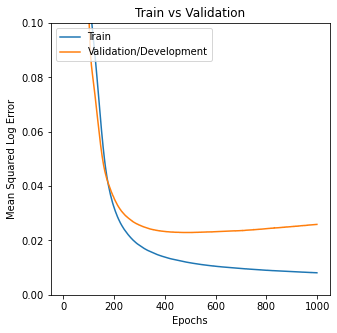

In [70]:
#Plotting
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
ax1.set_title('Train vs Validation')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Mean Squared Log Error')
ax1.plot(final_2l_history.history['msle'])
ax1.plot(final_2l_history.history['val_msle'])
ax1.legend(['Train', 'Validation/Development'],loc='upper left') 
ax1.set_ylim(0,0.1)

In [71]:
end_nn2l = time.time()
print("time to run two Layer NN:", end_nn2l - start_nn2l)

time to run two Layer NN: 2455.6181404590607


### Multi-layer NN - 3 layers

Would a 3-layer neural network imrpove?  Take lessons from previous analysis but apply it for a 3-layer.

Lessons learned before:  
1) Use 10 hidden nodes in 1st hidden layer  
2) Do not use dropout, l1 or l2 regularization
3) use learning rate of 0.01 with adam optimizer and relu activation function
4) use 1 or 10 batches for 100 epochs.

In [72]:
start_nn3l = time.time()

Batch Size: 1, Epochs: 100, Training Time: 86.359
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.024816153013908757


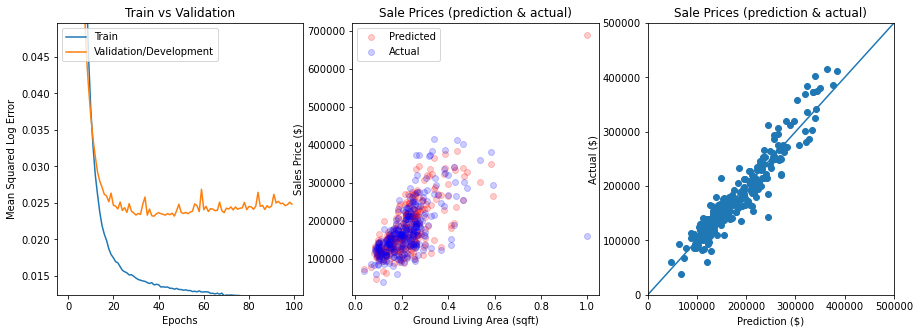

In [73]:
batch=1
epochs=100
hidden1_n=10
hidden2_n=5
act1='relu'
act2='relu'
act3='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

#Function for Three Layer Neural Network with default parameters
def nn_three_layer(batch=10, epochs=50, hidden1_n=10, hidden2_n=5, 
                   act1='linear', act2='linear', act3='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(hidden2_n, activation =act2))
    model.add(Dense(1, activation =act3))   
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


model_3l,history_3l,prediction_3l,train_time_3l = nn_three_layer(batch, epochs, hidden1_n, hidden2_n, 
                                                                           act1, act2, act3, 0, opti)
accuracies_nn(model_3l, history_3l, train_data, dev_data, prediction_3l, m=0, ylimit=0)


I see some overfitting. Going to apply dropout on first layer.

Batch Size: 1, Epochs: 100, Training Time: 81.805
Optimizer: Adam, Activation: relu
Hidden Layer Features: 10
Mean Squared Log Error: 0.029720406251567116


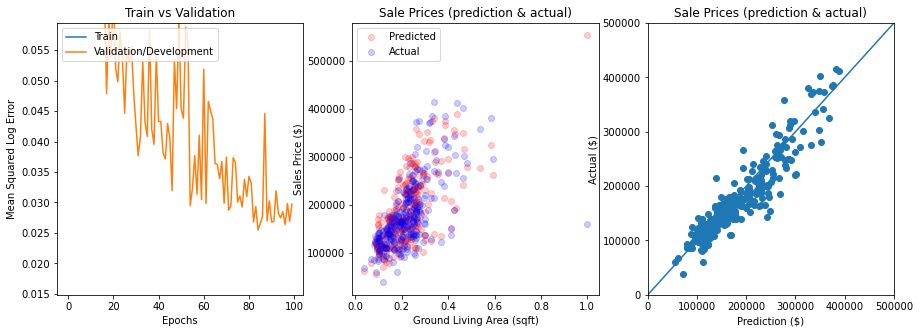

In [86]:
batch=1
epochs=100
hidden1_n=10
hidden2_n=5
act1='relu'
act2='relu'
act3='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)
dropout=0.5


#Function for Three Layer Neural Network with default parameters
def nn_three_layer(batch=10, epochs=50, hidden1_n=10, hidden2_n=5, 
                   act1='linear', act2='linear', act3='linear', verb=0, opti=optimizers.SGD(), dropout=0.5): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(dropout))
    model.add(Dense(hidden2_n, activation =act2))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation =act3))   
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


model_3ld,history_3ld,prediction_3ld,train_time_3ld = nn_three_layer(batch, epochs, hidden1_n, hidden2_n, 
                                                                           act1, act2, act3, 0, opti)
accuracies_nn(model_3ld, history_3ld, train_data, dev_data, prediction_3ld, m=0, ylimit=0)


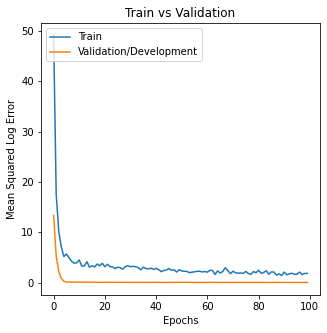

In [88]:
#Plotting
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
ax1.set_title('Train vs Validation')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Mean Squared Log Error')
ax1.plot(history_3ld.history['msle'])
ax1.plot(history_3ld.history['val_msle'])
ax1.legend(['Train', 'Validation/Development'],loc='upper left') 
#ax1.set_ylim(0,10)

In [76]:
end_nn3l = time.time()
print("time to run three Layer NN:", end_nn3l - start_nn3l)

time to run three Layer NN: 175.6992485523224


### Multi-layer NN - 4 layers

What about 4-layer neural network? 

In [ ]:
batch=1
epochs=100
hidden1_n=10
hidden2_n=5
act1='relu'
act2='relu'
act3='relu'
act4='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)
dropout=0.5


#Function for Three Layer Neural Network with default parameters
def nn_four_layer(batch=10, epochs=50, hidden1_n=10, hidden2_n=5, hidden3_n=2
                  act1='linear', act2='linear', act3='linear', act4='linear',
                  verb=0, opti=optimizers.SGD(), dropout=0.5): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(hidden2_n, activation =act2))
    model.add(Dense(hidden3_n, activation =act3))
    model.add(Dense(1, activation =act4))   
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


model_4ld,history_4ld,prediction_4ld,train_time_4ld = nn_three_layer(batch, epochs, hidden1_n, hidden2_n, hidden3_n, 
                                                                           act1, act2, act3,act4, 0, opti)
accuracies_nn(model_4ld, history_4ld, train_data, dev_data, prediction_4ld, m=0, ylimit=0)
